<a href="https://colab.research.google.com/github/EnriqueGRivas/Analisis_Bluex/blob/main/PP1/2_EDA_Audiomusica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=black size = 6 face="Verdana"><center><strong>SUPPLY CHAIN ANALYTICS - Gestión Moderna de la Cadena de Suministros</center></font>


  <font color=black><center>Fecha: 21-08-2024</center>


  <font color=#48c9b0><center>Elaborado por: Mg. Ec. Enrique F. Gutierrez Rivasplata</center>

### **Importando Paquetes:**

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Configurar los gráficos para mostrar en el cuaderno jupyter
# ==============================================================================
%matplotlib inline

# Establecer gráficos con un mejor estilo
# ==============================================================================
plt.style.use('seaborn-whitegrid')
sns.set(style="ticks")

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### **Contenido:**

<a id='beginning'></a>

1. [Lectura y Comprensión de los datos](#part1)
2. [Transformación de las Variables a trabajar](#part2)
3. [ANÁLISIS 1](#part3)
4. [Exploración y preprocesamiento de datos](#part4)
5. [Estadisticas Principales](#part5)
6. [Qué tipos de productos aportan el 80% de las ventas](#part6)
7. [¿Cuál es el volumen típico por pedido por tipo de producto?](#part7)
8. [Cuál es el rango de descuentos y devoluciones para cada tipo de producto](#part8)
9. [¿Existe una relación entre la tasa de Proporción de Ventas y la tasa de Costo de Envio?](#part9)
10. [ANÁLISIS 2](#part10)
11. [Detalle del comportamiento de las Variables a Analizar vs. Ventas](#part11)

<a id='part2'></a>
## <font color=#ba4a00><strong>Resumen:

El análisis a realizar, será una exploración de los datos proporcionados de un conjunto de datos del almacén de BLUEX como muestra. Al utilizar ese conjunto de datos, tenemos que realizar un análisis de datos exploratorio para establecer la relación oculta entre los puntos de datos en el conjunto de datos, como extraer información para mejorar el proceso de negocio de nuestro cliente AUDIOMUSICA y también recomendar decisiones prácticas que se deben tomar para mejorar el proceso de negocio de BLUEX. Esta es la importancia del análisis de datos. El análisis de datos exploratorio y el objetivo del estudio es descubrir las áreas débiles donde la gerencia pueda trabajar para obtener más ganancias y resolver los problemas comerciales explorando estos datos.

El problema aquí es descubrir las áreas débiles en las que el gerente comercial puede trabajar para obtener más ganancias y solucionar los problemas comerciales explorando los datos. En este conjunto de datos se tgrabajará en el cuaderno de Júpiter para realizar el análisis de datos exploratorios, limpiar los datos antes de realizar el análisis de datos exploratorios, debemos mirar el conjunto de datos que se proporciona.

<a id='part1'></a>
## <font color=#ba4a00><strong>Lectura y Comprensión de los Datos:

In [ ]:
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer el archivo Excel con los datos simulados
# ==============================================================================
data = pd.read_excel('/content/drive/MyDrive/Análisis - Python/DATOS/Data1.xlsx')


# Copiamos el dataframe
# ==============================================================================
df = data.copy()

# Mostrar las primeras filas del dataframe
# ==============================================================================
df.head()

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_por_Distribucion_SDD,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping,Slotting_Recepcion_Prom,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica
0,2015-01-03,2204383,3111,204978,Shipping,Standard Class,CON-10004331147,2015-01-03,2015-01-03,80,...,66603.25,0.0,349.650000,164.365385,223.8,291.375000,560.635385,66603.25,528.600,67692.485385
1,2015-01-03,2204384,3112,1097514,Shipping,Standard Class,EMP-20449216343,2015-01-05,2015-01-05,27,...,3379.95,0.0,413.696970,194.472935,49.0,344.747475,663.329501,3379.95,70.425,4113.704501
2,2015-01-03,2204387,3115,204754,Shipping,Standard Class,CON-10004331147,2015-01-05,2015-01-05,22,...,66150.00,0.0,8.910000,4.188462,11.8,7.425000,14.286462,66150.00,4488.750,70653.036462
3,2015-01-03,2204382,3110,1001830,Shipping,Standard Class,CON-10181604579,2015-01-05,2015-01-06,90,...,0.00,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,21752.75,32387.400,54360.743328
4,2015-01-05,2204395,3123,1001830,Shipping,Standard Class,EMP-20447989051,2015-01-06,2015-01-06,81,...,30453.85,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,30453.85,32387.400,63061.843328


In [ ]:
df.tail()

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_por_Distribucion_SDD,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping,Slotting_Recepcion_Prom,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica
26157,2017-12-31,2489762,13535,1091312,Shipping,Standard Class,CON-63101818,2018-01-05,2018-01-05,31,...,1572701.90,0.0,175.1220,82.322308,40.2,145.935,280.793908,1572701.90,0.0,1.572983e+06
26158,2017-12-31,2489738,14859,208143,Shipping,Standard Class,CON-62025400,2018-01-05,2018-01-05,27,...,525.00,0.0,116.9532,54.978000,70.2,97.461,187.524960,525.00,0.0,7.125250e+02
26159,2017-12-31,2489738,14859,1027260,Shipping,Standard Class,CON-62025400,2018-01-05,2018-01-05,23,...,48259.75,0.0,117.0000,55.000000,13.8,97.500,187.600000,48259.75,0.0,4.844735e+04
26160,2017-12-31,2489811,14279,200483,Shipping,Second Class,RET1-20503324033,2018-01-05,2018-01-05,4,...,397.95,0.0,642.8160,302.178462,19.0,535.680,1030.703262,397.95,0.0,1.428653e+03
26161,2017-12-31,2489955,14900,206518,Shipping,Standard Class,CON-74909163,2018-01-05,2018-01-05,89,...,5652.15,0.0,14.5440,6.836923,28.8,12.120,23.320123,5652.15,0.0,5.675470e+03


In [ ]:
# Mostramos el número de filas y columnas
# ==============================================================================
print(f'El dataframe tiene {df.shape[0]} filas y {df.shape[1]} columnas.')

El dataframe tiene 26162 filas y 81 columnas.


<a id='part2'></a>
## <font color=#ba4a00><strong>Mostrando el detalle de las variables a tratar:

In [ ]:
# Mostrando el tipo de datos que tiene la Variable "Familia"
# ==============================================================================
df['Familia'].unique()

array(['Pedal Guitarra', 'Guitarra', 'Funda', 'Atril', 'Baqueta', 'Cable',
       'Interfaz', 'Bateria', 'Tornamesa', 'Microfono', 'Piano', 'Violin',
       'Cuerdas', 'Controlador', 'Correas', 'Platillo', 'Shaker',
       'Pandero', 'Sist. Inalambrico', 'Caja Parlante', 'Sintetizador',
       'Accesorio', 'Mixer', 'Abrazadera', 'Afinador Guitarra', 'Teclado',
       'Flauta', 'Amplificador', 'Capsula Aguja Tor.',
       'Modulo Amplificador', 'Sillas', 'Cajon', 'Case', 'Bajo',
       'Parlantes', 'Sub Activo', 'Trombon', 'Partitura', 'Uñetas',
       'Parche', 'Caja Transporte', 'Rack Audio', 'Pedal Bateria',
       'Audifono', 'Efecto', 'Ecualizador', 'Caja Bateria', 'Acordeon',
       'Monitor', 'Saxo', 'Secuenciador', 'Trompeta',
       'Accesorio Limpieza', 'Conector', 'Sub Bajo', 'Armonica', 'Remo',
       'Procesador', 'Taburete', 'Metalfono', 'Clarin', 'Clarinete',
       'Lira', 'Viola', 'Cabezal', 'Triangulo', 'Herramientas', 'Maracas',
       'Conga', 'Tropicana', 'Bombo', '

In [ ]:
# Mostrando el número de transacciones en cada categría de la variable "Familia"
# ==============================================================================
df['Familia'].value_counts()

,count
Familia,
Guitarra,3257
Atril,1696
Pedal Guitarra,1568
Cuerdas,1492
Amplificador,1438
...,...
Clarin,17
Gabinete,16
Boquilla,10


In [ ]:
# Número de valores únicos en cada columna
# ==============================================================================
df.nunique()

,0
F_Orden,926
#Orden,13127
Factura,11461
Cod_Prod,1827
Proceso,1
...,...
Slotting_Recepcion_Prom,1209
Total_Ingresos_Almacen,1207
Ingresos_Distribucion,7316
Ingresos_Cancelaciones_Totales,370


<a id='part3'></a>
## <font color=#ba4a00><strong>Tipo de Datos:

In [ ]:
# Mostramos el tipo de datos de todo el dataframe
# ==============================================================================
df.dtypes

,0
F_Orden,datetime64[ns]
#Orden,int64
Factura,int64
Cod_Prod,int64
Proceso,object
...,...
Slotting_Recepcion_Prom,float64
Total_Ingresos_Almacen,float64
Ingresos_Distribucion,float64
Ingresos_Cancelaciones_Totales,float64


<a id='part4'></a>
## <font color=#ba4a00><strong>Visualización de valores perdidos:

<Axes: >

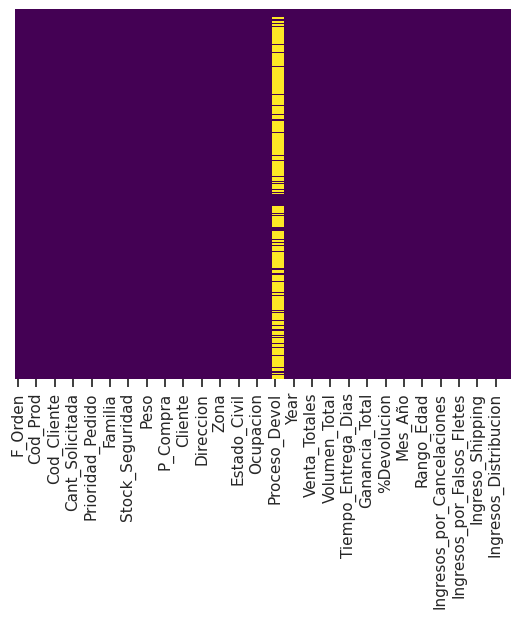

In [ ]:
# Visualización de valores perdidos
# ==============================================================================
sns.heatmap(df.isnull(),
            yticklabels = False,
            cbar = False,
            cmap='viridis')

In [ ]:
# Escogemos las columnas a trabajar, filtrando el numero que corresponden a las mismas - MUESTRA 1
# ==============================================================================
df1 = df.iloc[:, [9,10,21,22,24,25,26,41,44]]

df1.head(3)

,Cant_Solicitada,Cant_Enviada,Peso,Volumen,P_Compra,P_Venta,Inventario,Compras,Cant_Devol
0,80,72,2.550000,0.155400,17.619875,26.429813,15,15,8
1,27,24,3.971176,0.102147,2.682435,4.023653,27,27,7
2,22,20,1.000000,0.029700,26.856050,94.500000,2,2,19


In [ ]:
# Escogemos las columnas a trabajar, filtrando el numero que corresponden a las misma - MUESTRA 2
# ==============================================================================
df2 = df.iloc[:, [48,49,50,51,52,55,56,57,58,59,67,68,69,70,71,72,73,74,75]]

df2.head(3)

,Venta_Totales,Costo_Totales,Ganancia,Volumen_Total,Peso_Total,Inventario_Total,Descuento_Total,Ganancia_Total,Compra_Total,Devolucion_Total,Vol_Compras,Ingresos_Cajas,Ingresos_por_Cancelaciones,Ingresos_por_Distribucion_NBD,Ingresos_por_Distribucion_SDD,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping
0,1902.95,1268.63,634.32,11.19,183.60,264.30,761.18,1141.77,264.30,211.44,2.33100,46.620000,528.600,0.0,66603.25,0.0,349.65000,164.365385,223.8
1,96.57,64.38,32.19,2.45,95.31,72.43,19.31,77.26,72.43,28.17,2.75798,55.159596,70.425,0.0,3379.95,0.0,413.69697,194.472935,49.0
2,1890.00,537.12,1352.88,0.59,20.00,53.71,1512.00,378.00,53.71,1795.50,0.05940,1.188000,4488.750,0.0,66150.00,0.0,8.91000,4.188462,11.8


In [ ]:
# Escogemos las columnas a trabajar, filtrando el numero que corresponden a las misma - MUESTRA 3
# ==============================================================================
df3 = df.iloc[:, [77,78,79,80]]

df3.head(3)

,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica
0,560.635385,66603.25,528.600,67692.485385
1,663.329501,3379.95,70.425,4113.704501
2,14.286462,66150.00,4488.750,70653.036462


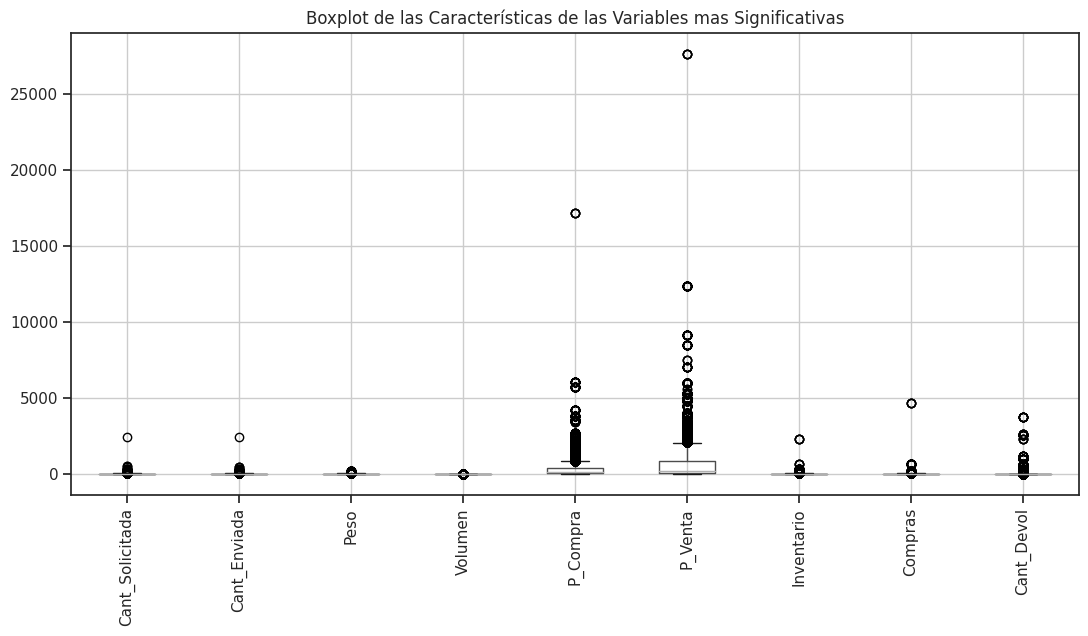

,count,mean,std,min,25%,50%,75%,max
Cant_Solicitada,26162.0,10.99,24.53,1.00,3.00,5.00,9.00,2420.00
Cant_Enviada,26162.0,10.18,23.37,0.00,3.00,4.00,9.00,2418.00
Peso,26162.0,6.01,10.65,0.00,0.48,2.46,6.03,145.50
Volumen,26162.0,0.07,0.11,0.00,0.03,0.03,0.07,3.89
P_Compra,26162.0,283.15,528.59,0.02,12.69,93.65,350.11,17174.21
P_Venta,26162.0,610.17,1023.83,0.03,34.95,207.35,849.50,27637.28
Inventario,26162.0,9.21,33.25,1.00,3.00,4.00,9.00,2313.00
Compras,26162.0,12.35,63.40,1.00,3.00,4.00,11.00,4626.00
Cant_Devol,26162.0,12.25,119.29,0.00,0.00,0.00,0.00,3704.00


In [ ]:
# Explorando las características de las variables (Boxplot de las características) - MUESTRA 1
# ===================================================================================
plt.figure(figsize=(13, 6))
df1.boxplot()
plt.title('Boxplot de las Características de las Variables mas Significativas')
plt.xticks(rotation=90)
plt.show()

# Resumen estadístico de las características
# ===================================================
df1.describe().transpose().round(2)

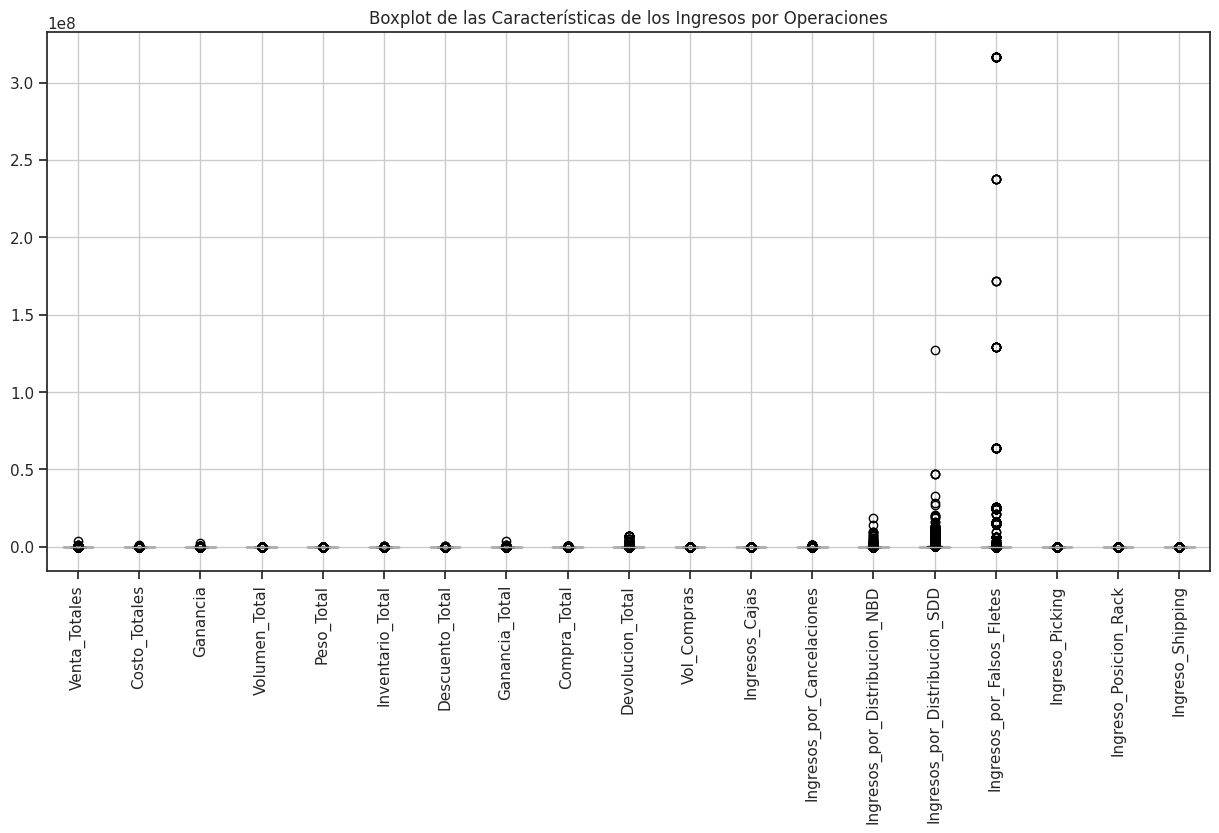

,count,mean,std,min,25%,50%,75%,max
Venta_Totales,26162.0,6594.40,36388.52,0.00,187.25,898.50,3747.50,3.625779e+06
Costo_Totales,26162.0,3193.93,16651.78,0.00,70.25,352.32,1569.33,1.382177e+06
Ganancia,26162.0,3400.47,20859.86,-2260.70,79.12,396.01,1756.00,2.243602e+06
Volumen_Total,26162.0,0.74,2.51,0.00,0.09,0.18,0.48,1.031400e+02
Peso_Total,26162.0,63.77,266.77,0.00,1.68,9.24,38.03,1.353150e+04
Inventario_Total,26162.0,2568.86,9473.15,0.10,77.69,380.18,1559.01,3.606584e+05
Descuento_Total,26162.0,927.41,6990.61,0.00,0.00,0.00,149.70,4.844715e+05
Ganancia_Total,26162.0,5666.99,34003.21,0.00,157.29,748.50,3116.10,3.625779e+06
Compra_Total,26162.0,3792.44,14668.51,0.14,81.24,394.17,1679.26,3.606584e+05
Devolucion_Total,26162.0,12784.79,218352.65,0.00,0.00,0.00,0.00,7.035970e+06


In [ ]:
# Explorando las características de las variables (Boxplot de las características) - MUESTRA 2
# ===================================================================================
plt.figure(figsize=(15, 7))
df2.boxplot()
plt.title('Boxplot de las Características de los Ingresos por Operaciones')
plt.xticks(rotation=90)
plt.show()

# Resumen estadístico de las características
# ===================================================
df2.describe().transpose().round(2)

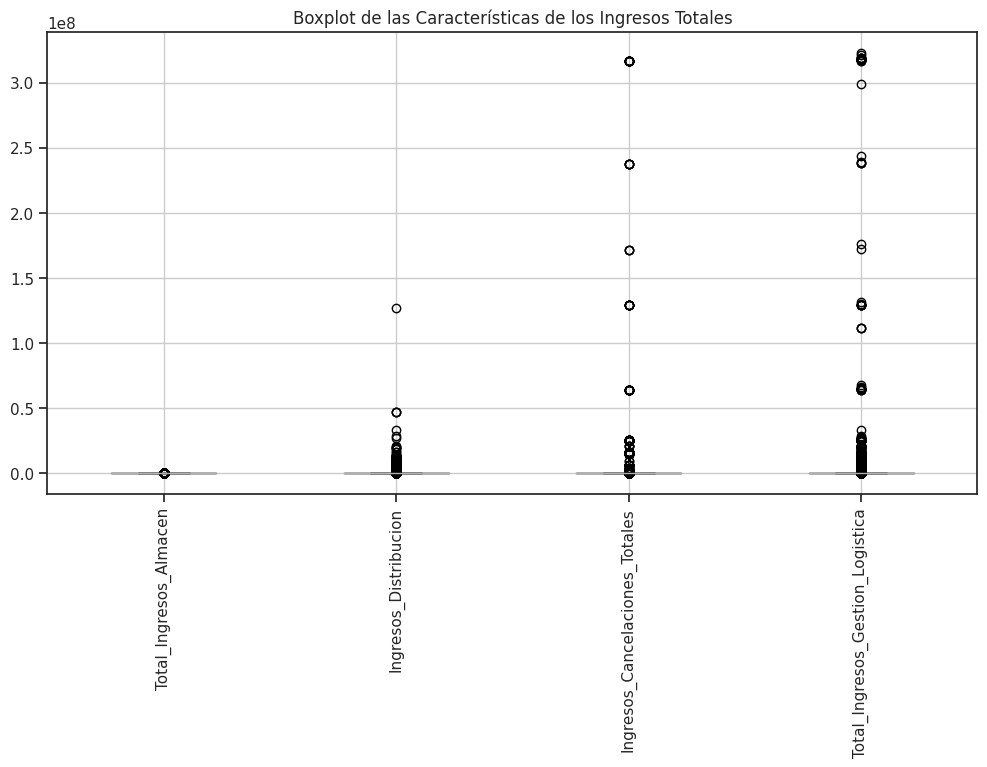

,count,mean,std,min,25%,50%,75%,max
Total_Ingresos_Almacen,26162.0,205.48,1061.22,1.34,23.61,50.51,128.04,7.453112e+04
Ingresos_Distribucion,26162.0,224300.90,1253053.83,0.00,6008.36,29732.50,122640.00,1.269023e+08
Ingresos_Cancelaciones_Totales,26162.0,455312.00,9794073.81,0.00,0.00,0.00,0.00,3.166187e+08
Total_Ingresos_Gestion_Logistica,26162.0,679818.38,10046600.01,7.92,6419.38,31919.13,139942.16,3.226817e+08


In [ ]:
# Explorando las características de las variables (Boxplot de las características) - MUESTRA 2
# ===================================================================================
plt.figure(figsize=(12, 6))
df3.boxplot()
plt.title('Boxplot de las Características de los Ingresos Totales')
plt.xticks(rotation=90)
plt.show()

# Resumen estadístico de las características
# ===================================================
df3.describe().transpose().round(2)

<a id='part5'></a>
## <font color=#ba4a00><strong>Análisis Exploratorio Simple:

In [ ]:
# Porcentaje de la media por cada variable.
# ==============================================================================
print('----------------------')
print('Media de cada variable')
print('----------------------')
df1.mean(axis=0).round(2)

----------------------
Media de cada variable
----------------------


,0
Cant_Solicitada,10.99
Cant_Enviada,10.18
Peso,6.01
Volumen,0.07
P_Compra,283.15
P_Venta,610.17
Inventario,9.21
Compras,12.35
Cant_Devol,12.25


In [ ]:
# Porcentaje de la Varianza por cada variable.
# ==============================================================================
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
np.round(df1.var(axis=0),4)

-------------------------
Varianza de cada variable
-------------------------


,0
Cant_Solicitada,6.017646e+02
Cant_Enviada,5.460276e+02
Peso,1.134710e+02
Volumen,1.210000e-02
P_Compra,2.794063e+05
P_Venta,1.048233e+06
Inventario,1.105689e+03
Compras,4.019201e+03
Cant_Devol,1.422905e+04


$$varianza = s^2 = \frac{\sum^n_{i=1}\left ( x_i-\bar{x} \right )^2}{n-1}$$

La varianza es muy distinta entre las variables, en el caso de las Compras de Audiomusica, la varianza es de magnitud superior al resto.

Si no se estandarizan las variables para que tengan $\mu=0$ y $\sigma=1$, antes de realizar el estudio de Predicción u otro, las variables **Precio Venta** y **Precio Compra**, que tienen una media muy alta y la variable **Cantidad Solicitada** y **Cantidad Enviada**, que tienen una dispersión muy superior al resto, dominarán la mayoría de las componentes principales.

<a id='part6'></a>
## <font color=#ba4a00><strong>Análisis de Correlación entre columnas - Muestra 2:

In [ ]:
# Correlación lineal entre variables numéricas
# ==============================================================================
corr_matrix = df2.corr(method='pearson') #  Esta línea calcula la matriz de correlación de Pearson
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)
corr_matrix_tidy

,variable_1,variable_2,r,r_abs
0,Vol_Compras,Ingreso_Picking,1.000000,1.000000
1,Ingreso_Picking,Ingreso_Posicion_Rack,1.000000,1.000000
2,Ingresos_Cajas,Ingreso_Posicion_Rack,1.000000,1.000000
3,Volumen_Total,Ingreso_Shipping,1.000000,1.000000
4,Vol_Compras,Ingresos_Cajas,1.000000,1.000000
...,...,...,...,...
166,Vol_Compras,Ingresos_por_Cancelaciones,-0.007061,0.007061
167,Ingresos_Cajas,Ingresos_por_Cancelaciones,-0.007061,0.007061
168,Ingresos_por_Cancelaciones,Ingresos_por_Falsos_Fletes,-0.006789,0.006789
169,Ingresos_por_Cancelaciones,Ingreso_Shipping,0.006231,0.006231


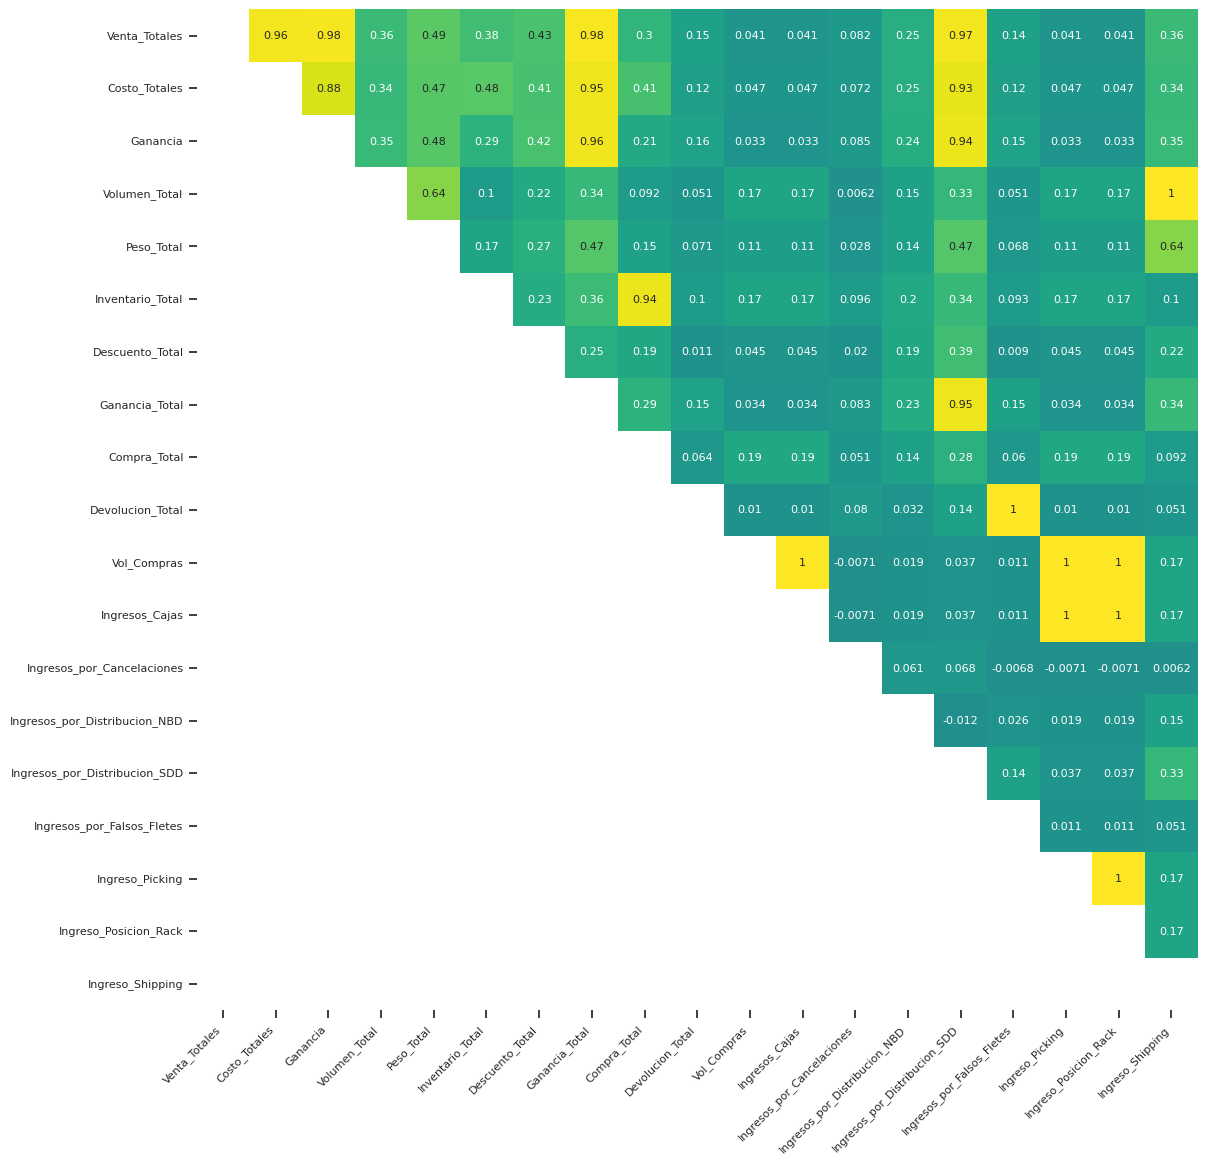

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 13))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "viridis",
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 8)

<a id='part7'></a>
## <font color=#ba4a00><strong>ANÁLISIS COMERCIAL:

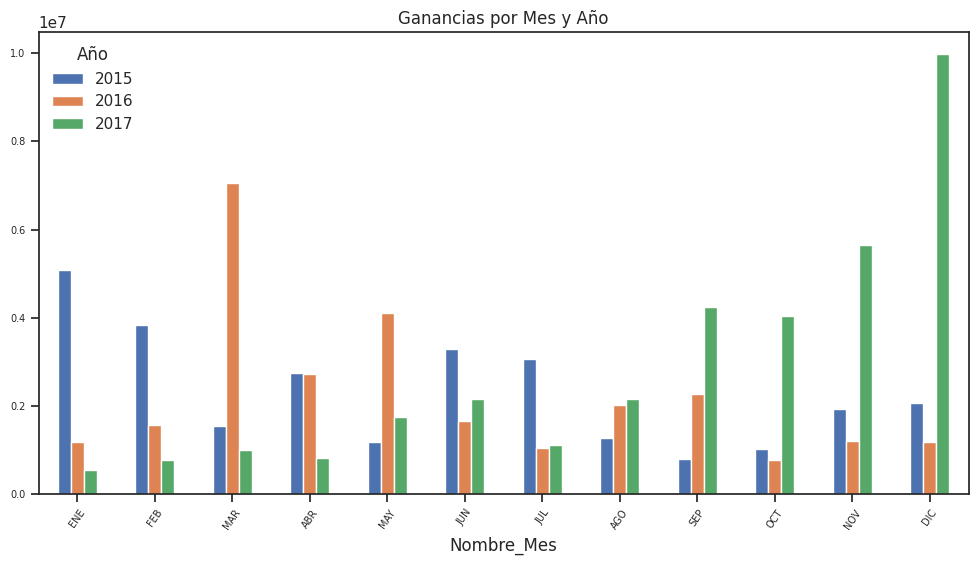

In [ ]:
#Grafica de Barras:
# ==============================================================================
# Orden de los meses
month_order = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC']

# Conviertimos 'Nombre_Mes' en una variable categórica con el orden especificado
df['Nombre_Mes'] = pd.Categorical(df['Nombre_Mes'], categories=month_order, ordered=True)

# Agrupamos por 'Year' y 'Nombre_Mes' y calculamos la suma de 'Venta_Totales'
df_grouped = df.groupby(['Year','Nombre_Mes'])['Ganancia'].sum().unstack(level=0)

# Trazar los datos agrupados con diferentes colores para cada año y tamaño ajustado
fig, ax = plt.subplots(figsize=(12, 6))
df_grouped.plot(kind='bar', ax=ax)

plt.xticks(rotation=55)
plt.tick_params(axis='x', labelsize=7)
plt.tick_params(axis='y', labelsize=7)
plt.title("Ganancias por Mes y Año")
plt.legend(title='Año')

plt.show()

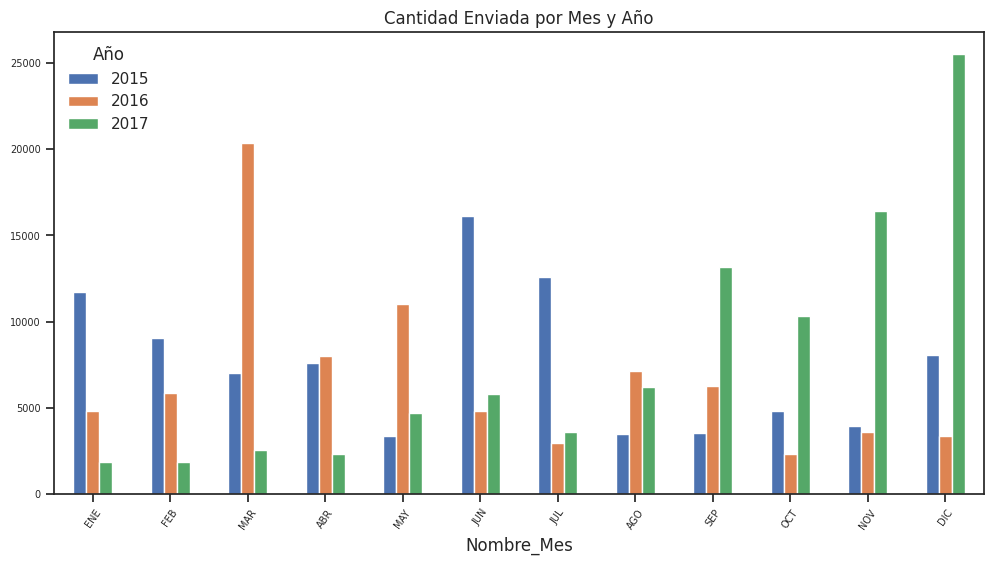

In [ ]:
#Grafica de Barras:
# ==============================================================================
# Orden de los meses
month_order = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC']

# Conviertimos 'Nombre_Mes' en una variable categórica con el orden especificado
df['Nombre_Mes'] = pd.Categorical(df['Nombre_Mes'], categories=month_order, ordered=True)

# Agrupamos por 'Year' y 'Nombre_Mes' y calculamos la suma de 'Venta_Totales'
df_grouped = df.groupby(['Year','Nombre_Mes'])['Cant_Enviada'].sum().unstack(level=0)

# Trazar los datos agrupados con diferentes colores para cada año y tamaño ajustado
fig, ax = plt.subplots(figsize=(12, 6))
df_grouped.plot(kind='bar', ax=ax)

plt.xticks(rotation=55)
plt.tick_params(axis='x', labelsize=7)
plt.tick_params(axis='y', labelsize=7)
plt.title("Cantidad Enviada por Mes y Año")
plt.legend(title='Año')

plt.show()

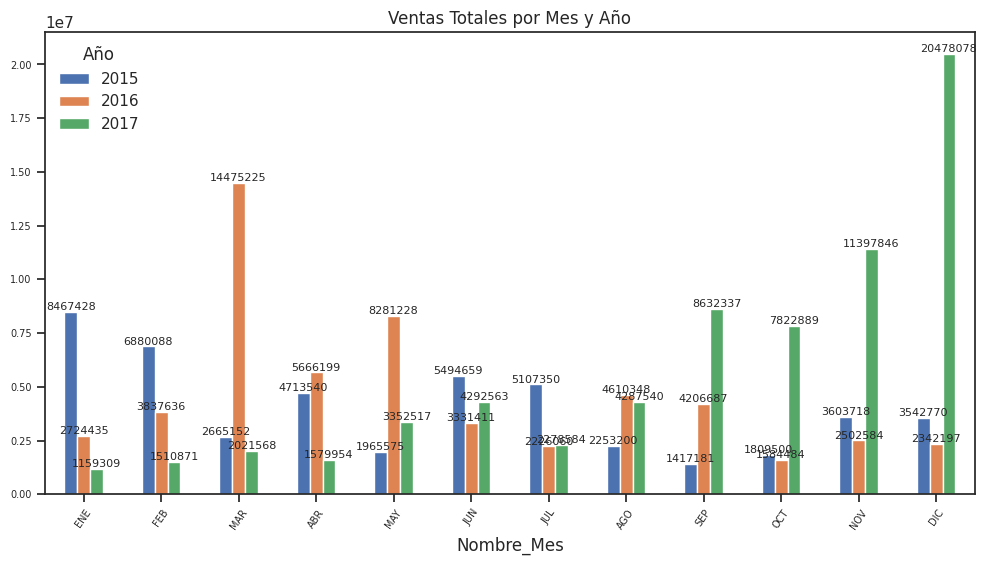

In [ ]:
#Grafica de Barras:
# ==============================================================================
# Orden de los meses
month_order = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC']

# Conviertimos 'Nombre_Mes' en una variable categórica con el orden especificado
df['Nombre_Mes'] = pd.Categorical(df['Nombre_Mes'], categories=month_order, ordered=True)

# Agrupamos por 'Year' y 'Nombre_Mes' y calculamos la suma de 'Venta_Totales'
df_grouped = df.groupby(['Year','Nombre_Mes'])['Venta_Totales'].sum().unstack(level=0)

# Trazar los datos agrupados con diferentes colores para cada año y tamaño ajustado
ax = df_grouped.plot(kind='bar', figsize=(12, 6))

plt.xticks(rotation=55)
plt.tick_params(axis='x', labelsize=7)
plt.tick_params(axis='y', labelsize=7)
plt.title("Ventas Totales por Mes y Año")
plt.legend(title='Año')

# Agregamos etiquetas de valores en las barras
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=8, ha='center', va='bottom')

plt.show()

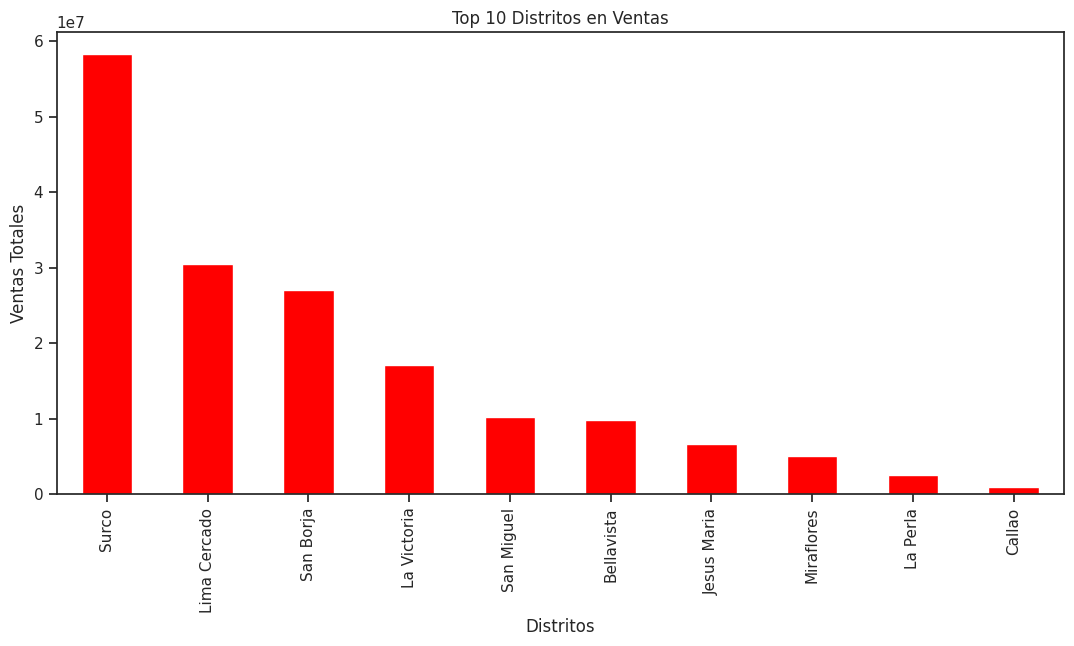

In [ ]:
# Top 10 de los Distritos con mas Vendidos
# ==============================================================================
plt.figure(figsize=(13,6))
top10distritos = data.groupby('Distrito')['Venta_Totales'].sum().sort_values(ascending=False)
top10distritos = top10distritos [:10]
top10distritos.plot(kind='bar', color='red')
plt.title('Top 10 Distritos en Ventas')
plt.ylabel('Ventas Totales')
plt.xlabel('Distritos')

plt.show()
# Surco encabeza la lista de los mejores Distritos en Ventas por Audiomusica

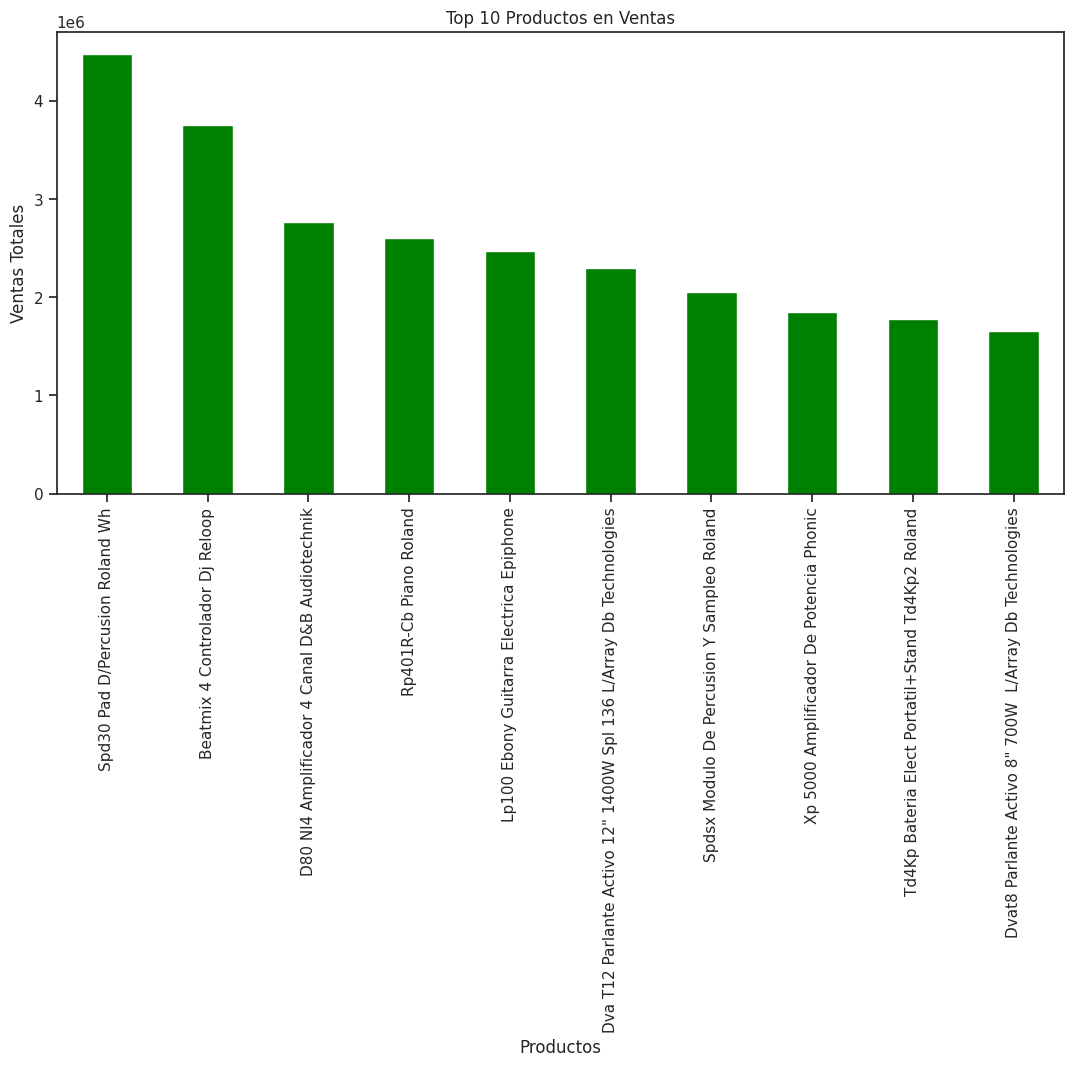

In [ ]:
# Top 10 de los Productos mas Vendidos
# ==============================================================================
plt.figure(figsize=(13,6))
top10productos = data.groupby('Descripcion_Prod')['Venta_Totales'].sum().sort_values(ascending=False)
top10productos = top10productos [:10]
top10productos.plot(kind='bar', color='green')
plt.title('Top 10 Productos en Ventas')
plt.ylabel('Ventas Totales')
plt.xlabel('Productos')

plt.show()
# G-400 Pro Cherry Guitarra Electrica Epiphone encabeza la lista de los Productos con mas Ventas por Audiomusica

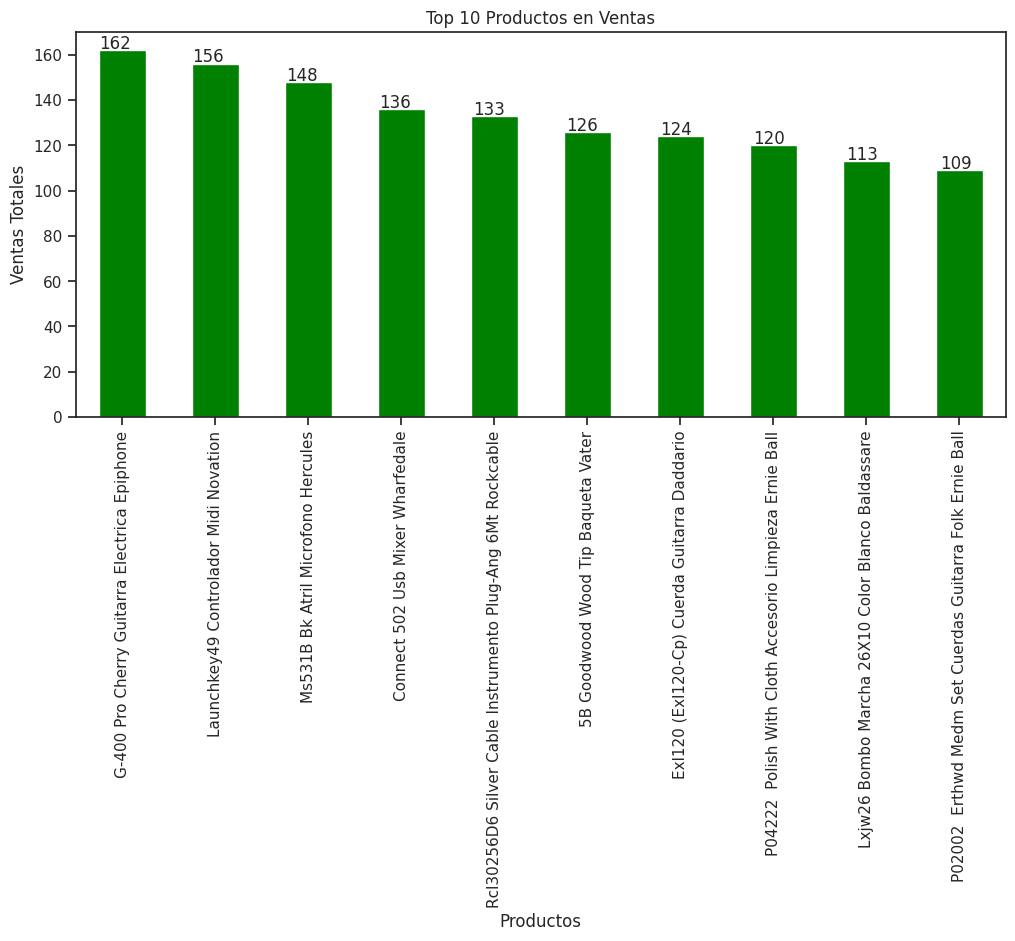

In [ ]:
# Top 10 de los Productos mas veces Vendidos
# ==============================================================================

plt.figure(figsize=(12,5))
top10productos = data.groupby('Descripcion_Prod')['Venta_Totales'].count().sort_values(ascending=False) # Numero de Ventas realizadas
top10productos = top10productos [:10]
ax = top10productos.plot(kind='bar', color='green')
plt.title('Top 10 Productos en Ventas')
plt.ylabel('Ventas Totales')
plt.xlabel('Productos')

# Agregamos etiquetas de valores en las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()
# G-400 Pro Cherry Guitarra Electrica Epiphone encabeza la lista de los Productos con mas Ventas por Audiomusica

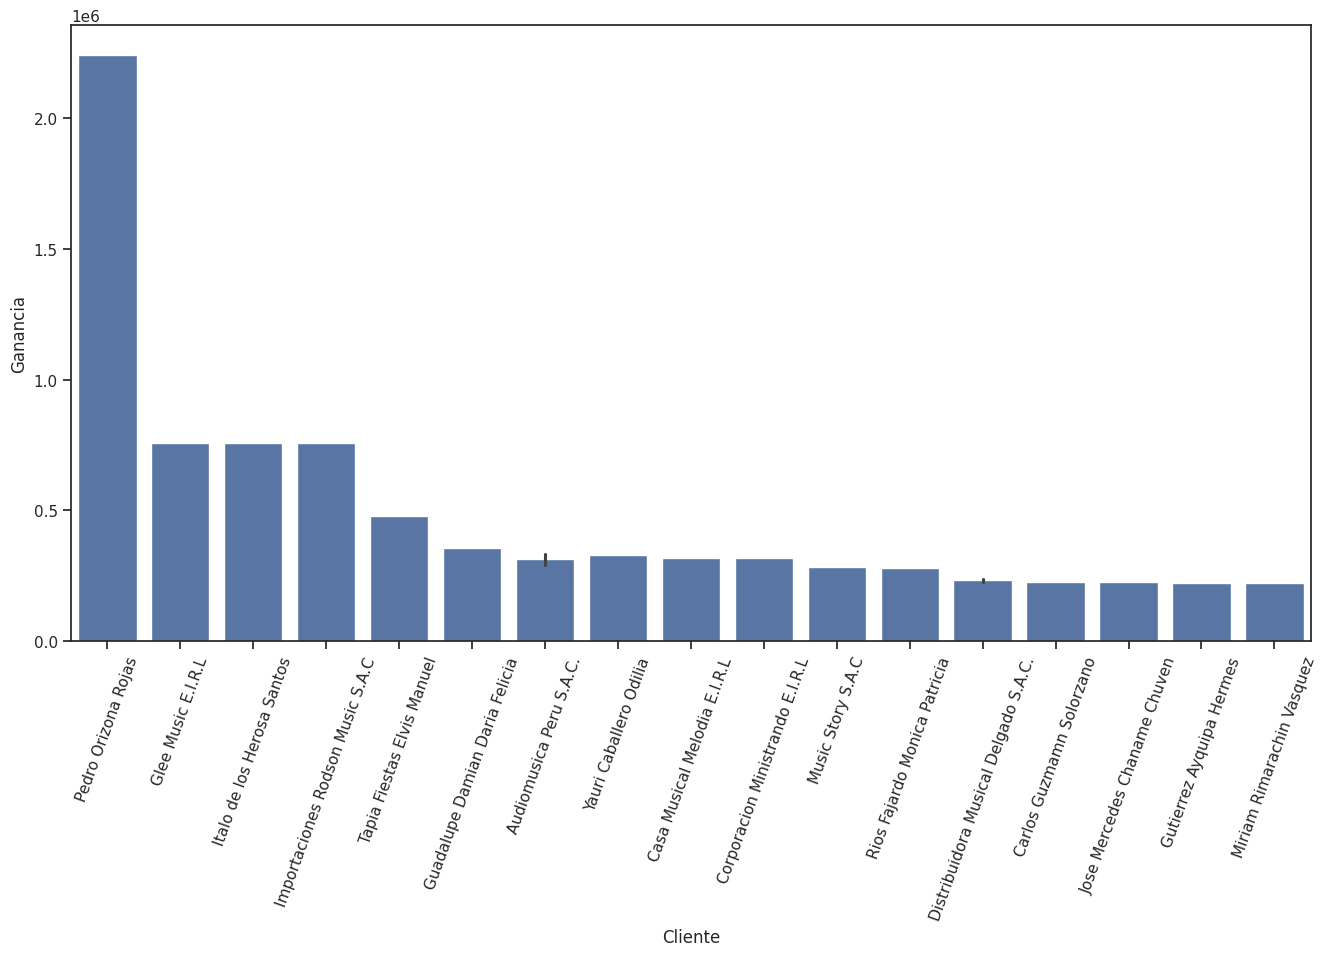

In [ ]:
# Los 20 Clientes más Rentables
# ==============================================================================
# ¿Quiénes son los 20 clientes más rentables?

plt.figure(figsize=(16,8))
bar_width = 0.2
opacity= 0.8
top20utilidad = df.sort_values('Ganancia', ascending=False)
top20 = top20utilidad.head(20)
top20[['Cliente', 'Ganancia']]
sns.barplot(x = "Cliente", y= "Ganancia", data=top20)  # Trazado de los 20 principales clientes rentables
plt.xticks(rotation=70) # Rotar etiquetas del eje x 70 grados
plt.show()
# Pedro Orizona Rojas encabeza a todos los clientes en ganancias.

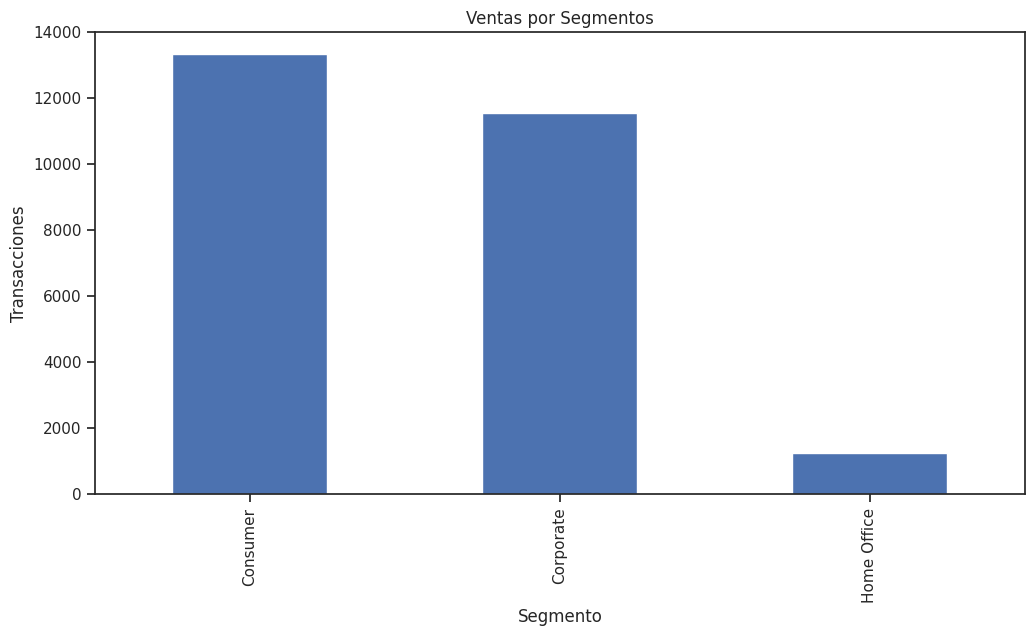

In [ ]:
# Segmentos con mas transacciones
# ==============================================================================
plt.figure(figsize=(12,6))
data['Segmento'].value_counts().plot.bar()
plt.title('Ventas por Segmentos')
plt.ylabel('Transacciones')
plt.xlabel('Segmento')
plt.show()
# Segmento "Consumer" encabeza todos los mercados.

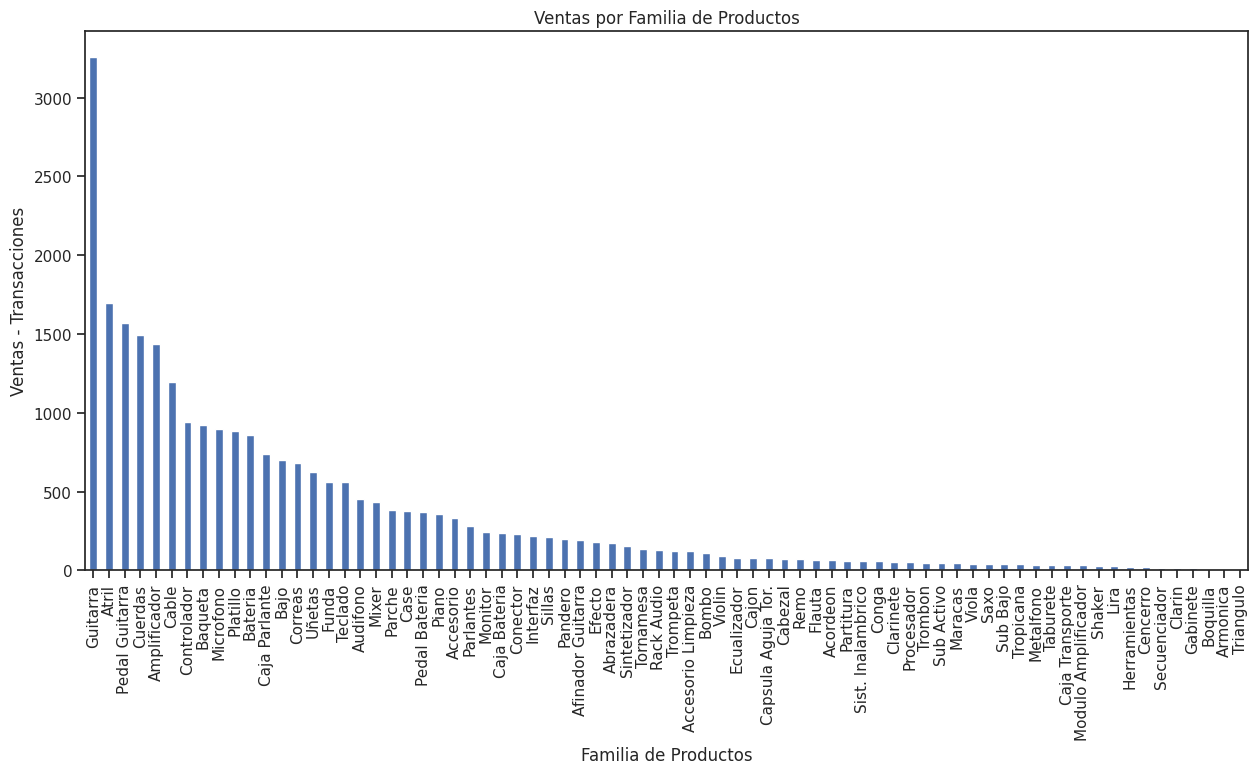

In [ ]:
# Familia de Productos con mas salidas
# ==============================================================================
plt.figure(figsize=(15,7))
df['Familia'].value_counts().plot.bar()
plt.title('Ventas por Familia de Productos')
plt.ylabel('Ventas - Transacciones')
plt.xlabel('Familia de Productos')
plt.show()
# Guitarra encabeza todas las Ventas en Categorías

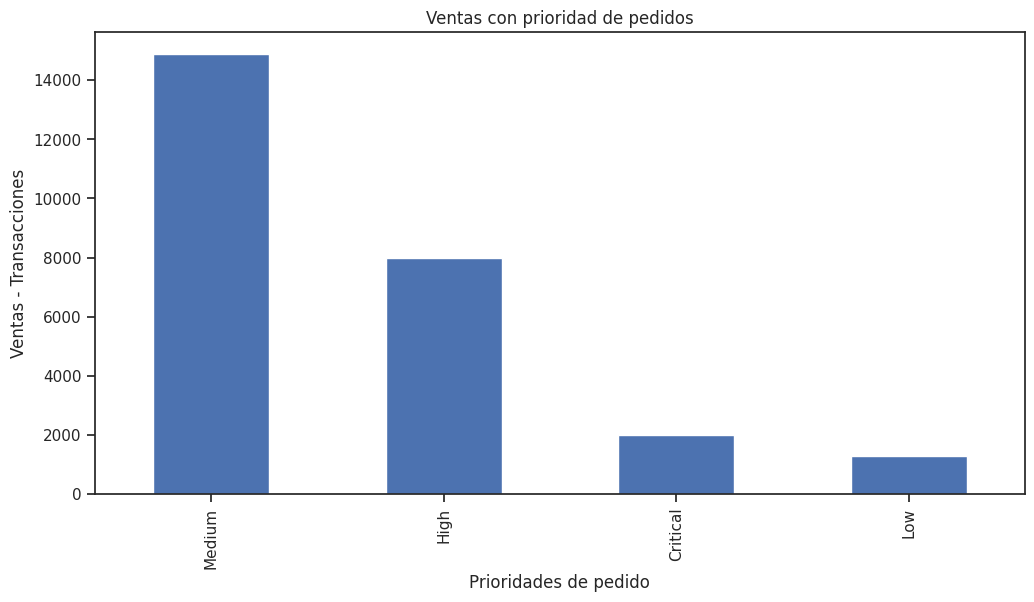

In [ ]:
# Orden de Prioridad
# ==============================================================================
plt.figure(figsize=(12,6))
df['Prioridad'].value_counts().plot.bar()
plt.title('Ventas con prioridad de pedidos')
plt.ylabel('Ventas - Transacciones')
plt.xlabel('Prioridades de pedido')
plt.show()
# Medium encabeza todas las ventas en prioridades de pedidos

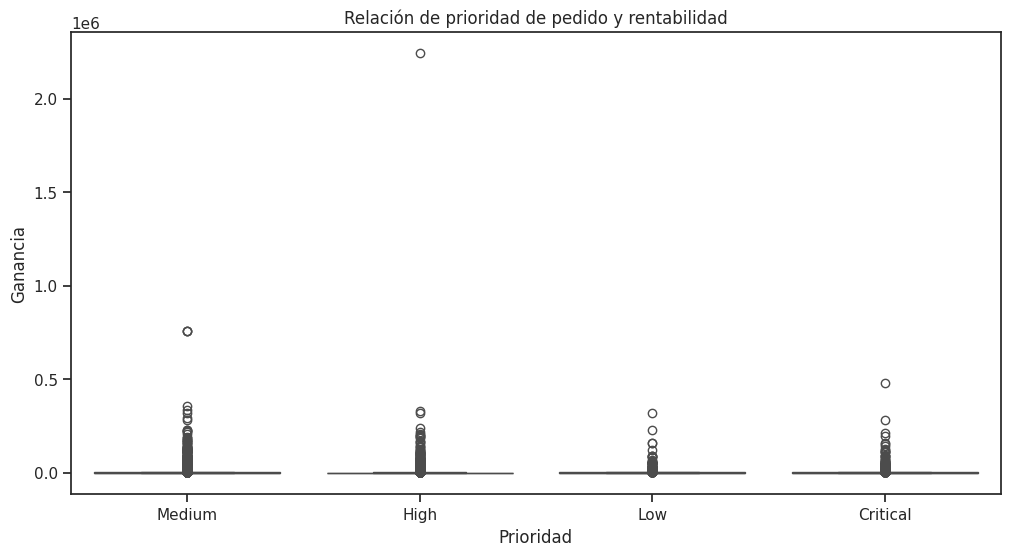

In [ ]:
# Relación de prioridad de pedido y rentabilidad
# ==============================================================================
plt.figure(figsize=(12,6))
sns.boxplot(x="Prioridad",y="Ganancia",data= df)
plt.title('Relación de prioridad de pedido y rentabilidad')
plt.show()
# Las ganancias son ligeramente mayores cuando la prioridad del pedido es Media

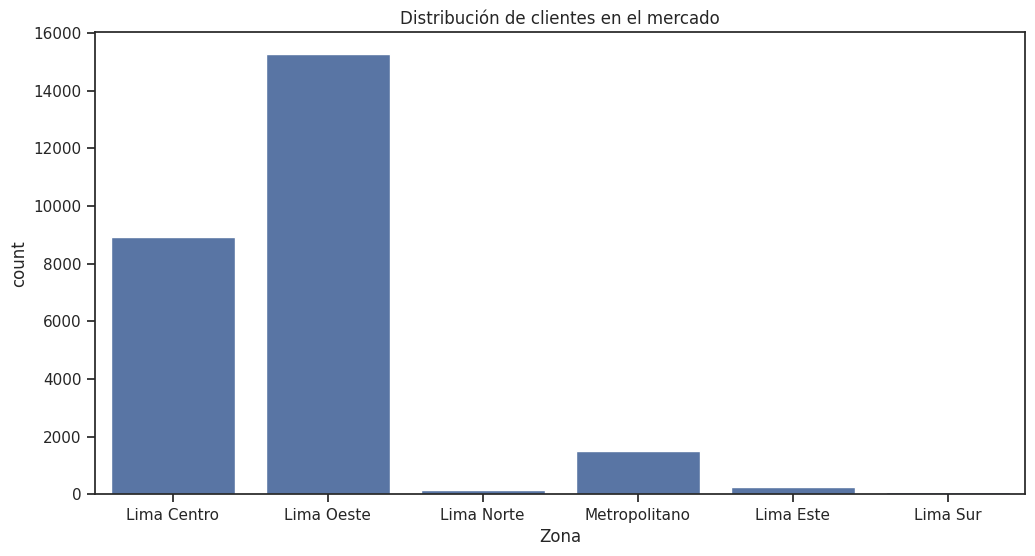

In [ ]:
# Distribución de Clientes en cuanto a Mercado.
# ==============================================================================
# ¿Cuál es la distribución de clientes en el mercado?
plt.figure(figsize=(12,6))
sns.countplot(x="Zona",data = df)
plt.title('Distribución de clientes en el mercado')
plt.show()
# El mercado de Lima esta comprendida por 6 zonas. Lima Oeste tiene el mayor número de clientes, seguido de Lima Centro y Metropolitana en ese orden.
# Lima Sur tiene el menor número de clientes

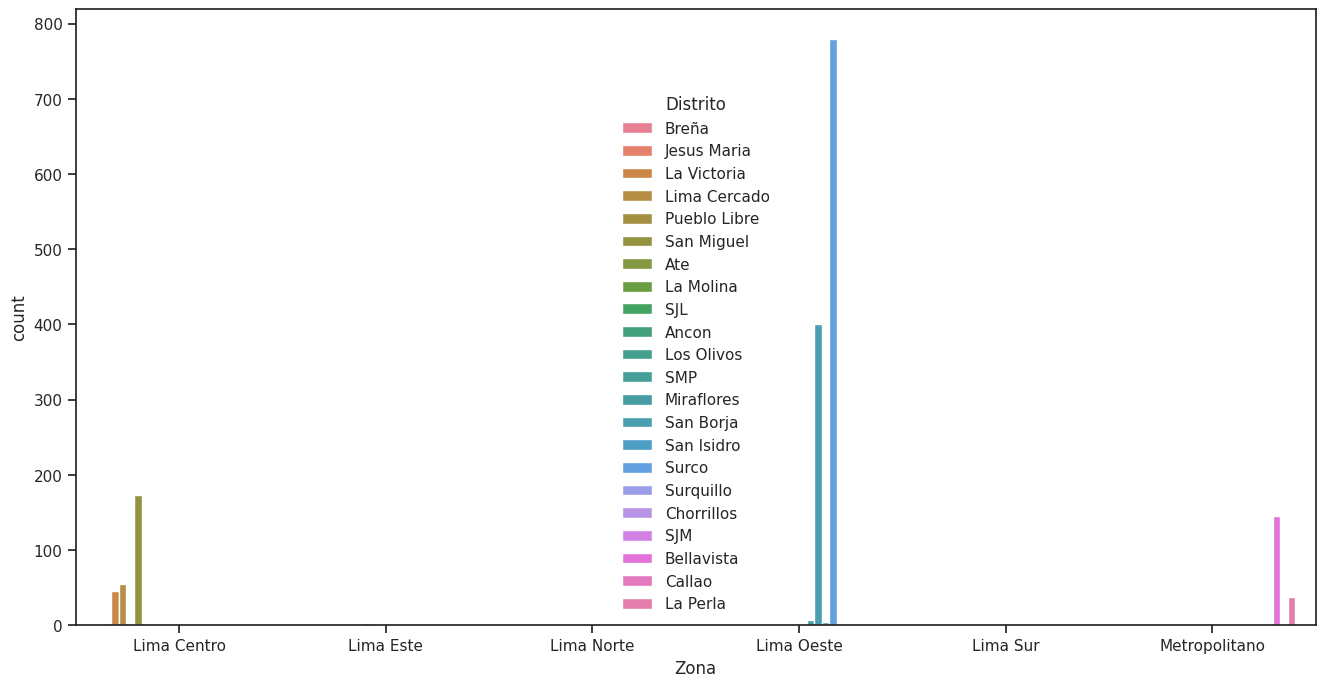

In [ ]:
# Distribución de clientes por Zona y Distrito
# ==============================================================================
plt.figure(figsize=(16,8))
df['Zona'].value_counts()
cmr = pd.DataFrame({'Count' : df.groupby(["Zona","Distrito","Cliente"]).size()}).reset_index()
sns.countplot(x="Zona", hue= "Distrito", data = cmr)
plt.show()
# Para la Zona Oeste, el mayor número de clientes provienen del distrito de Surco, seguido por el Distrito de Miraflores.
# En Lima, el mayor número de clientes se encuentra en la zona Oeste, seguida de la zona Centro.

<Figure size 2400x1500 with 0 Axes>

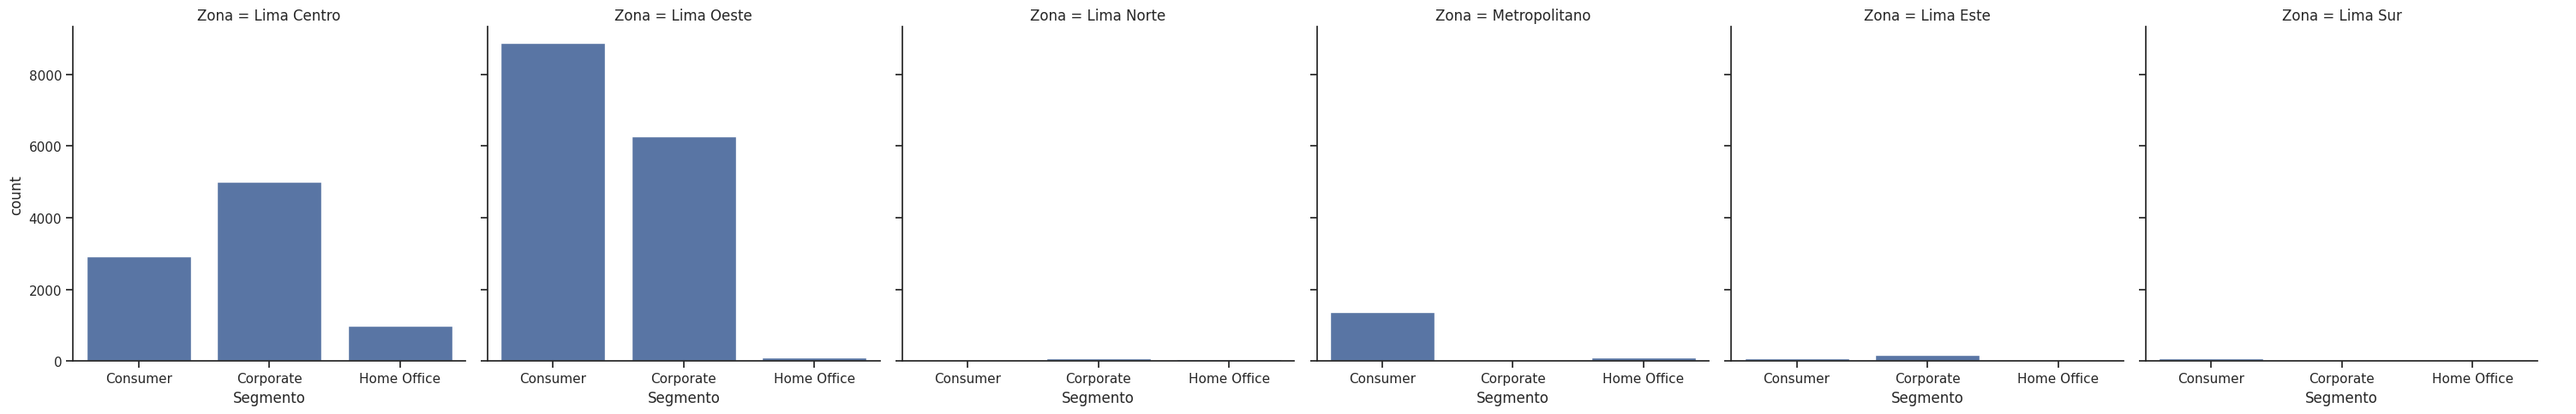

In [ ]:
# Segmento de Clientes
# ==============================================================================
# ¿Cuál es la distribución de nuestro segmento de clientes por Zona?
plt.figure(figsize=(24,15))
sns.catplot(x="Segmento", col="Zona", data=df, kind="count")
plt.show()
# Se muestran los segmentos del mercado.

<Figure size 900x500 with 0 Axes>

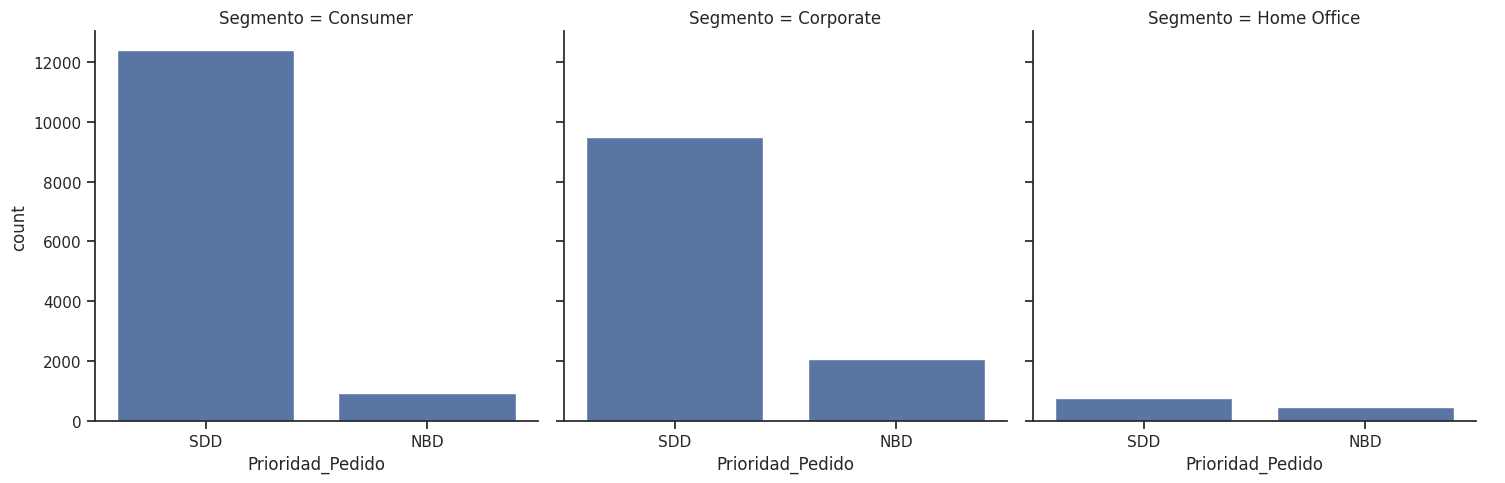

In [ ]:
# Segmento de Pedidos
# ==============================================================================
# ¿Cuál es la distribución de nuestros Pedidos por Segmento?
plt.figure(figsize=(9,5))
sns.catplot(x="Prioridad_Pedido", col="Segmento", data=df, kind="count")
plt.show()
# Se muestran la prioridad de pedidos por segmento.

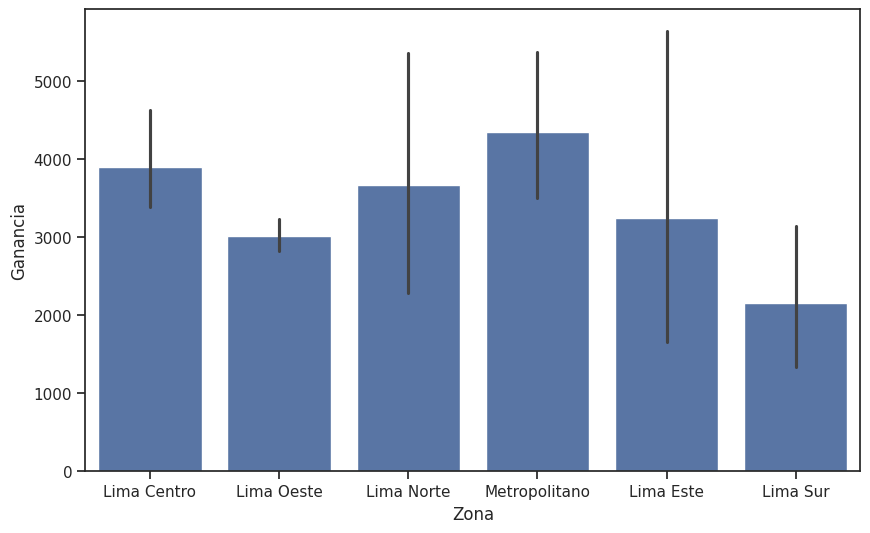

In [ ]:
# Zonas y Utilidad
# ==============================================================================
# Relación de las Zonas y la Utilidad
plt.figure(figsize=(10,6))
sns.barplot(x="Zona", y= "Ganancia",data=df)
plt.show()
# Lima Este y Lima Norte tiene una alto impacto en la Utilidad

In [ ]:
# Los 20 principales clientes antiguos
# ==============================================================================
# ¿Quiénes son nuestros 20 clientes más antiguos?
df['F_Orden'] = pd.to_datetime(df['F_Orden'])
top20Clientes= df.sort_values(['F_Orden'], ascending=False).head(20)
top20Clientes.loc[:,['Cliente']]


,Cliente
26161,Rojas Badoino Aldo Miguel
26151,Arroyo Tello Jose Antonio
26068,Rodriguez Huamani Gloria Beatriz
26112,Audiomusica Peru S.A.C.
26122,Arroyo Tello Jose Antonio
26145,Montoya Quispe Liliana Beatriz
26093,Sanchez Garcia Jesus Oswaldo
26084,Alvarado Agreda Sebastian
26097,Montoya Quispe Liliana Beatriz
26118,Montoya Quispe Liliana Beatriz


In [ ]:
# Los clientes visitaron solo una vez
# ==============================================================================
# ¿Qué clientes han visitado esta tienda sólo una vez?
Visit=df.groupby('Cliente').apply(lambda x: pd.Series(dict(visit_count=x.shape[0])))
Visit.loc[(Visit.visit_count==5)] # Aqui se puede colocar el número de visitas

# 509 Clientes realizaron 5 veces una compra.

,visit_count
Cliente,
Abad Bazan Carla Victoria,5
Abad Sequeiros Ray Jefferson,5
Aburto Benavides Julio Cesar,5
Acevedo Vasquez Jose Luis,5
Aguilar Berru Edilberto,5
...,...
Zedano Zamora Norma,5
Zegarra Zavaleta Daniel Alfredo,5
Zelaya Arteaga Maria Domitila,5


<a id='part8'></a>
## <font color=#ba4a00><strong>PREGUNTAS CLAVES:

### **Tablas de frecuencia para todas las variables categóricas**

In [ ]:
# Tabla de Frecuencia de las Variables Categóricas:
# ==============================================================================

Tabla_Frecuencia = df.loc[:,df.dtypes == "object"].describe()
Tabla_Frecuencia.transpose()

,count,unique,top,freq
Proceso,26162,1,Shipping,26162
Tipo_Envio,26162,4,Standard Class,15669
Cod_Cliente,26162,1669,RET2-20503324033,3135
Operador,26162,4,Euflavio Lucano,7927
Prioridad_Pedido,26162,2,SDD,22655
Prioridad,26162,4,Medium,14883
SKU,26162,1827,GU-1096787,162
Familia,26162,74,Guitarra,3257
Descripcion_Prod,26162,1827,G-400 Pro Cherry Guitarra Electrica Epiphone,162
Marca,26162,76,Ibanez,1581


### **Histogramas para todas las variables continuas y barras de frecuencia para variables categóricas.**

#### **Histogramas para variables continuas:**

In [ ]:
# Variables Continuas
# ==============================================================================
Variables_Continuas = df.loc[:,df.dtypes == "float64"].columns
Variables_Continuas


Index(['Peso', 'Volumen', 'Descuento', 'P_Compra', 'P_Venta', 'Venta_Totales',
       'Costo_Totales', 'Ganancia', 'Volumen_Total', 'Peso_Total',
       'Inventario_Total', 'Descuento_Total', 'Ganancia_Total', 'Compra_Total',
       'Devolucion_Total', '%Devolucion', 'Vol_Compras', 'Ingresos_Cajas',
       'Ingresos_por_Cancelaciones', 'Ingresos_por_Distribucion_NBD',
       'Ingresos_por_Distribucion_SDD', 'Ingresos_por_Falsos_Fletes',
       'Ingreso_Picking', 'Ingreso_Posicion_Rack', 'Ingreso_Shipping',
       'Slotting_Recepcion_Prom', 'Total_Ingresos_Almacen',
       'Ingresos_Distribucion', 'Ingresos_Cancelaciones_Totales',
       'Total_Ingresos_Gestion_Logistica'],
      dtype='object')

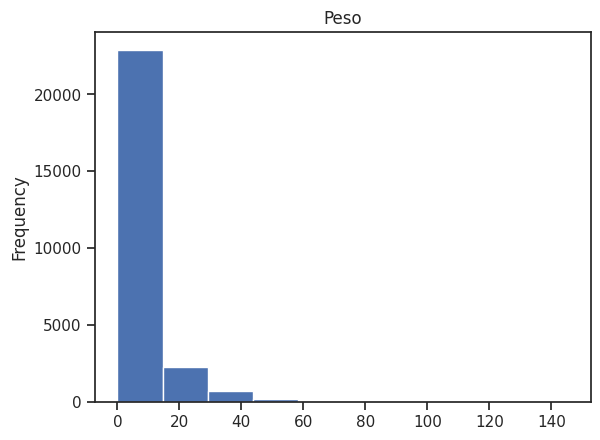

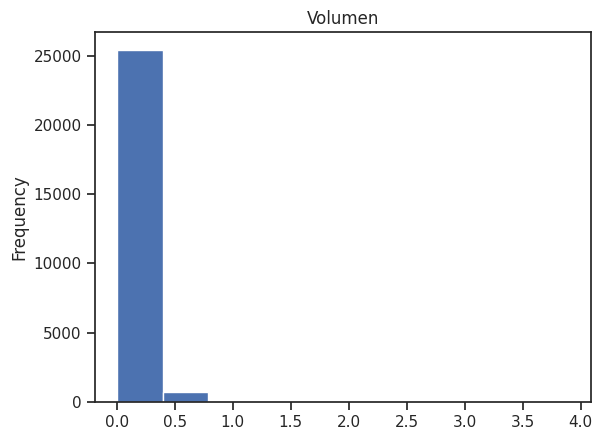

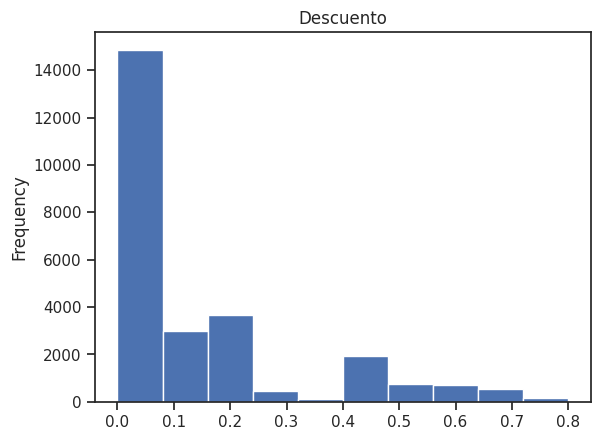

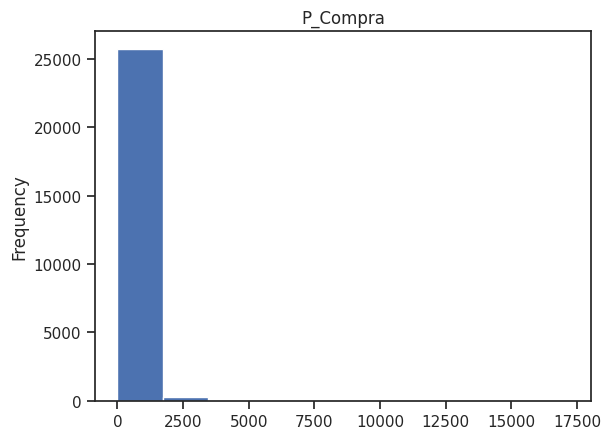

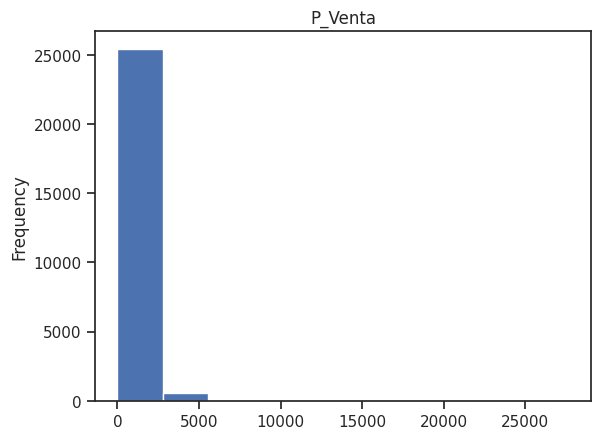

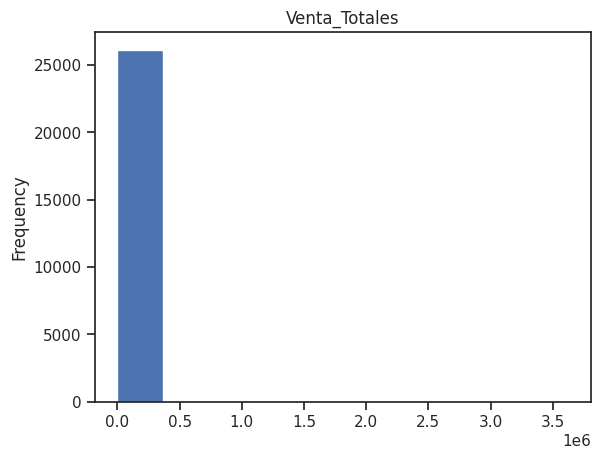

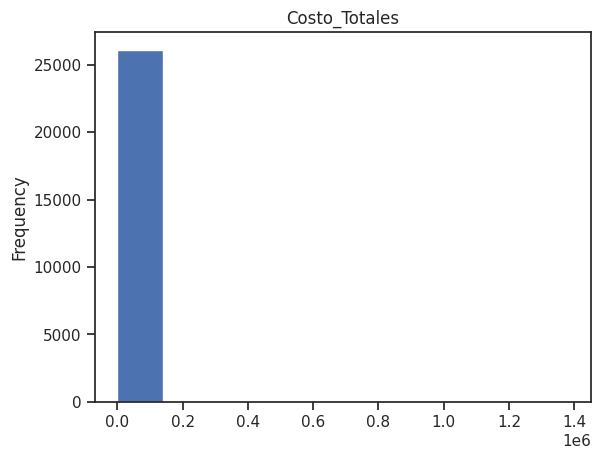

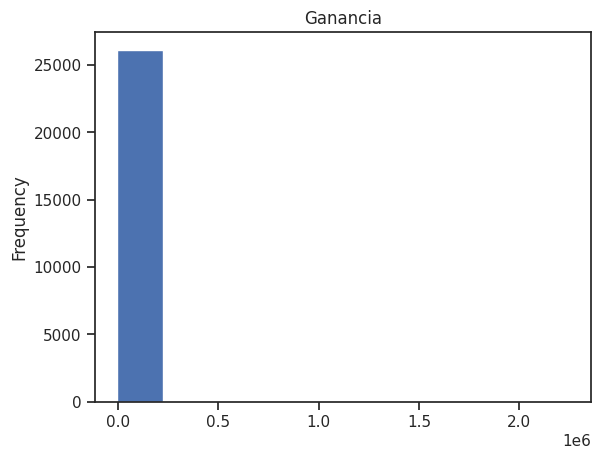

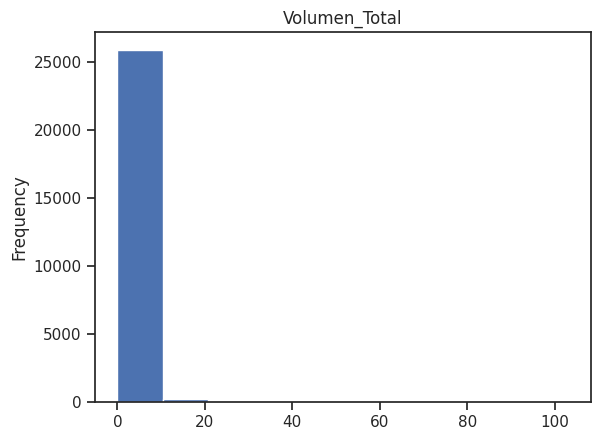

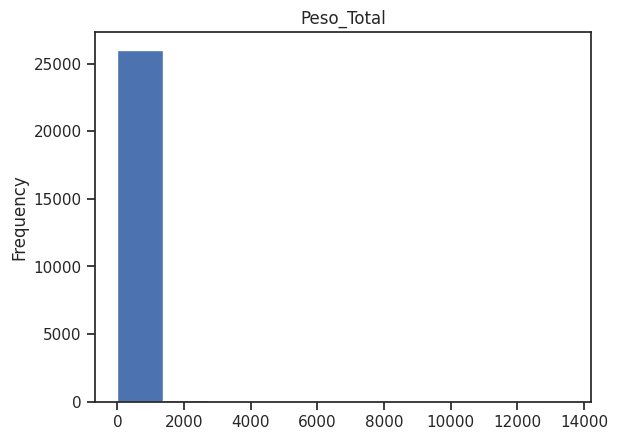

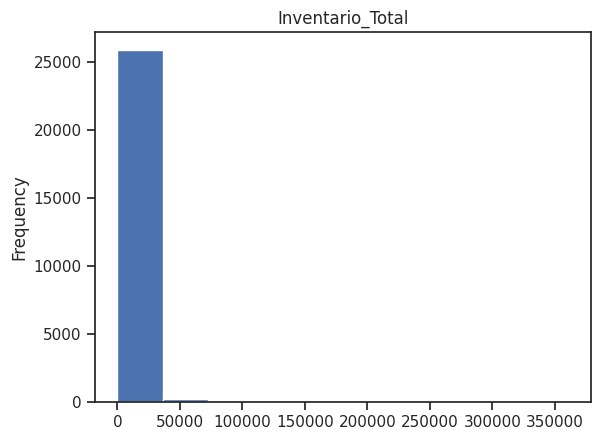

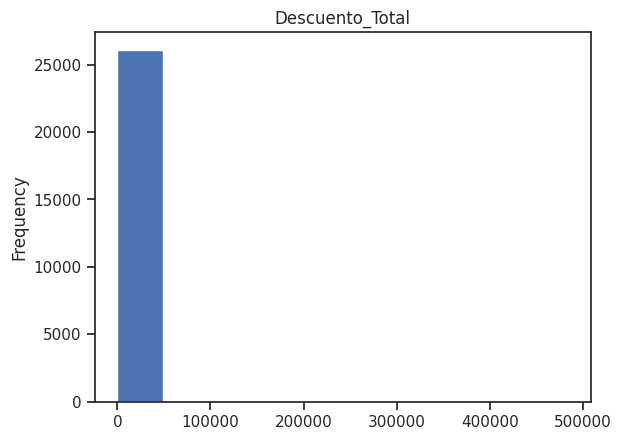

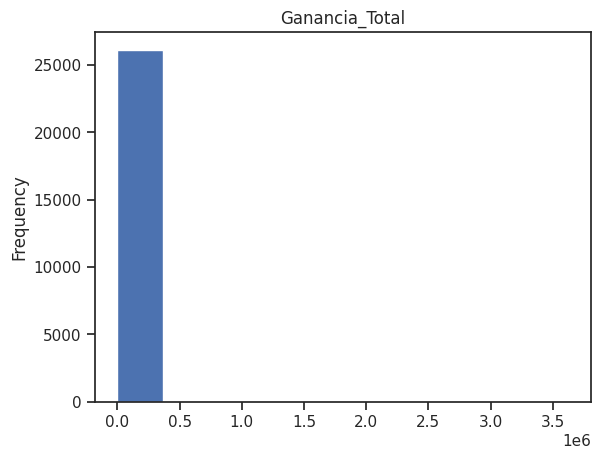

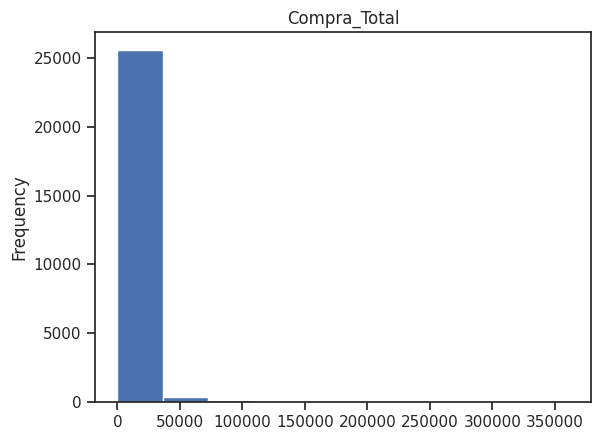

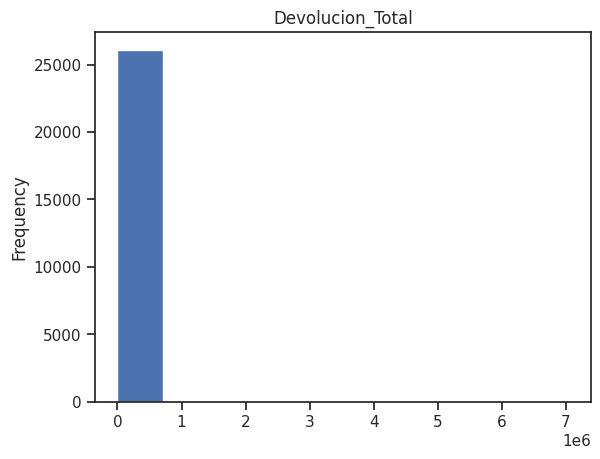

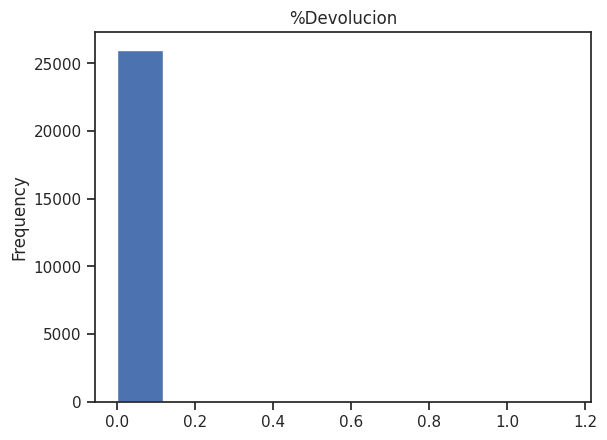

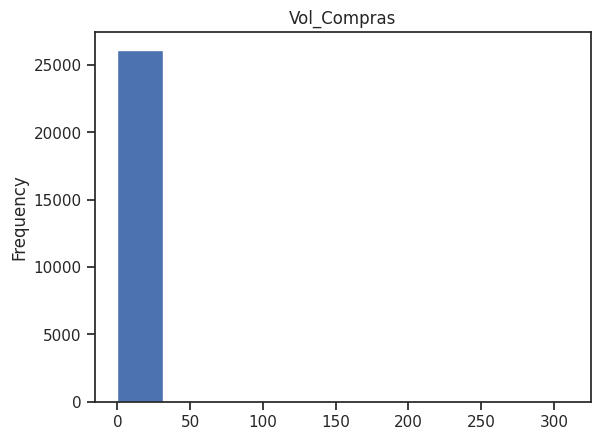

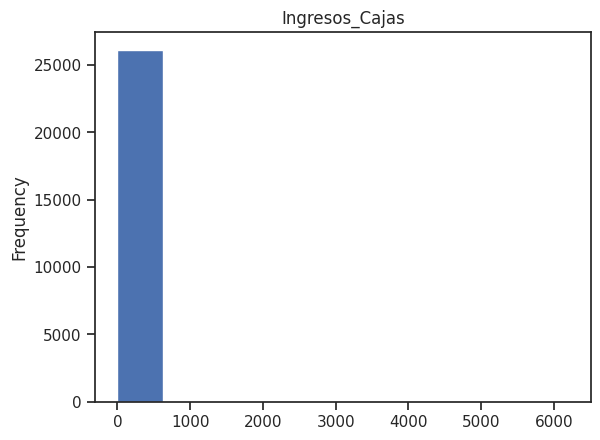

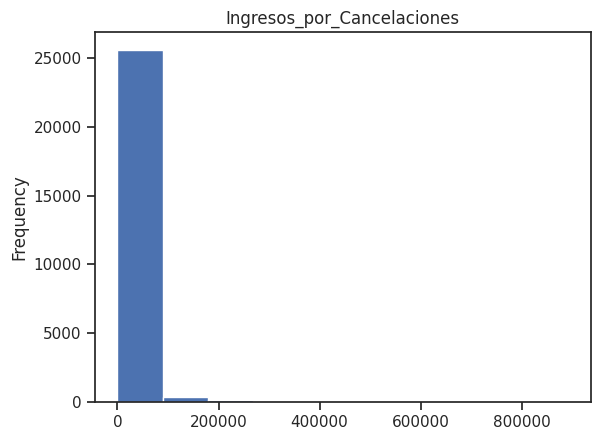

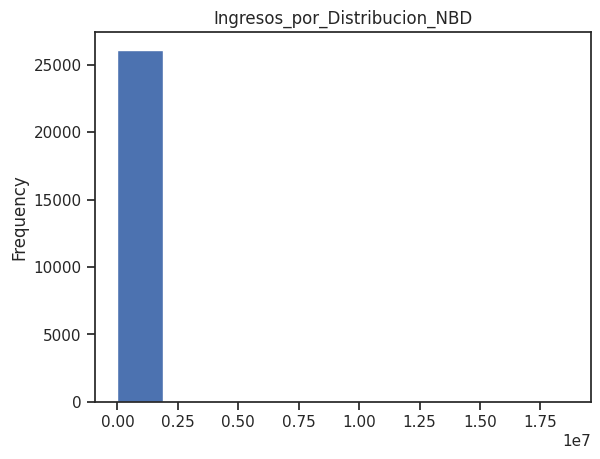

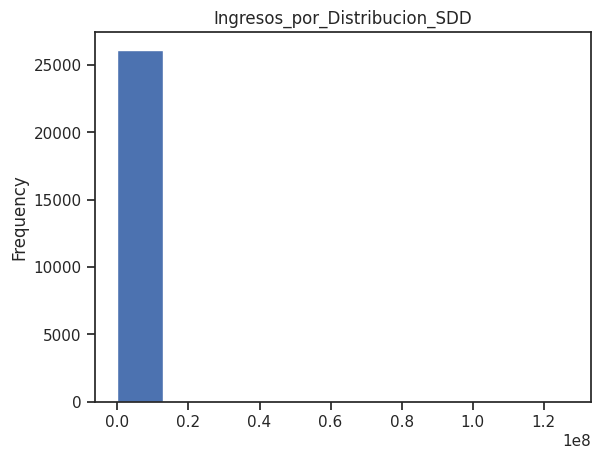

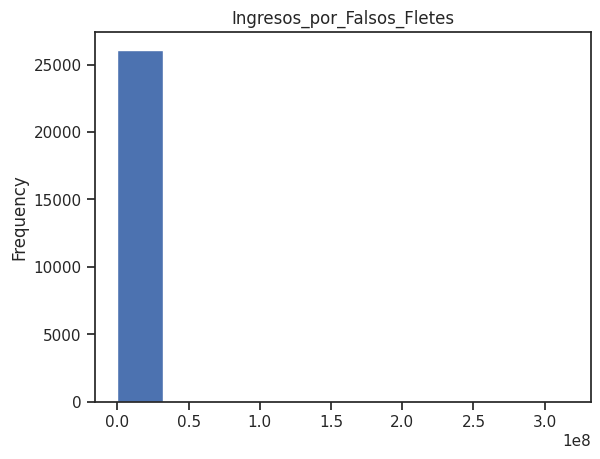

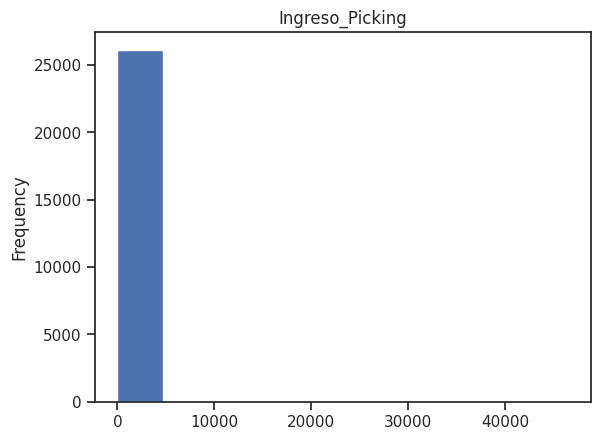

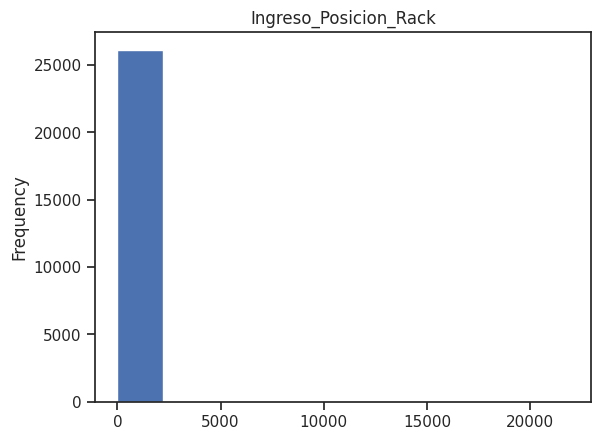

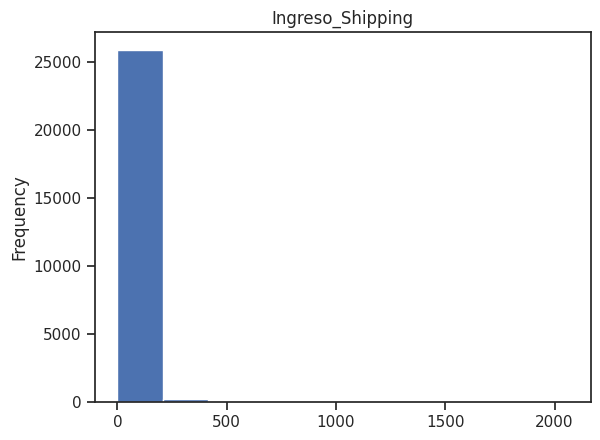

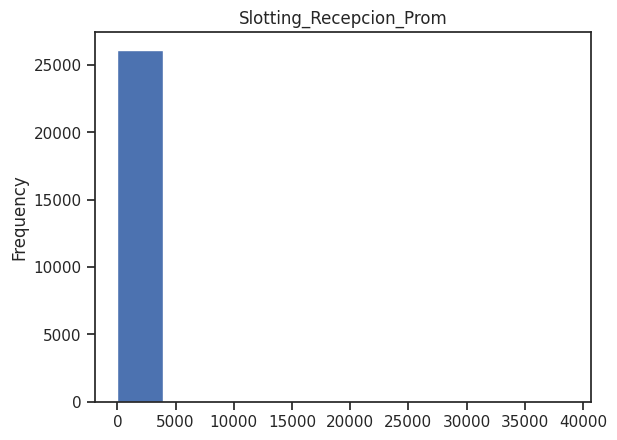

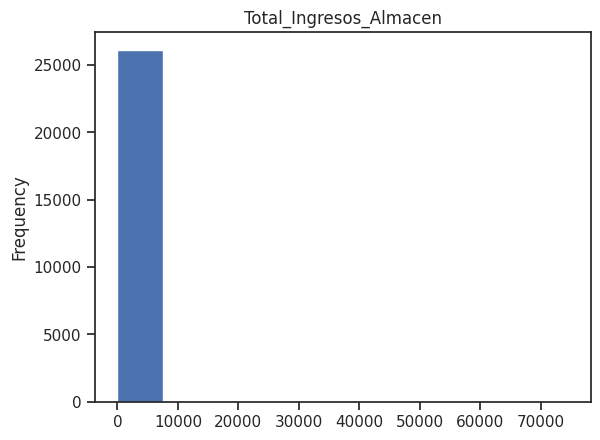

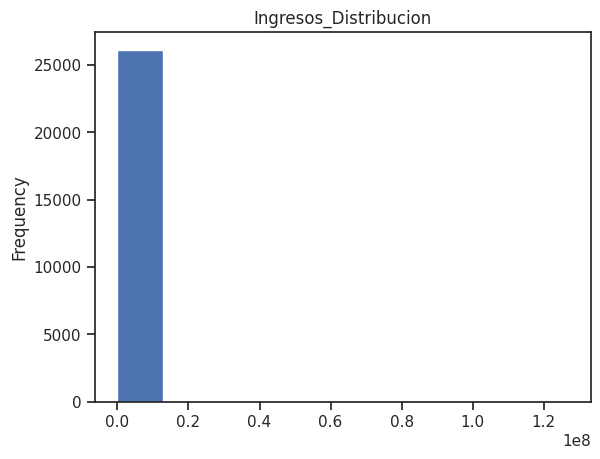

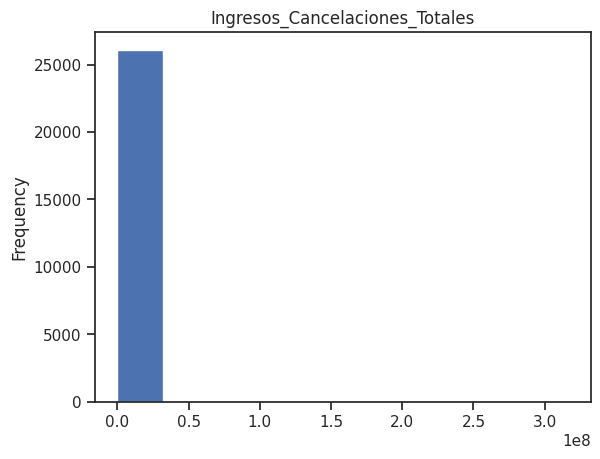

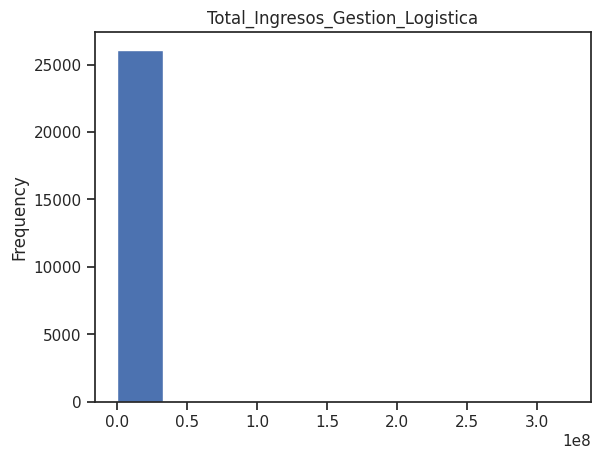

In [ ]:
# Creamos Histogramas para todas las Variables Continuas
# ==============================================================================
for var in  Variables_Continuas:
    df[var].plot(kind="hist")
    plt.title(var)
    plt.show()

### **Variables Categricas:**

In [ ]:
# Variables Categóricas:
# ==============================================================================
Variables_categoricas = df.loc[:,df.dtypes == "object"]
Variables_categoricas.columns
# Variables_categoricas.head()

Index(['Proceso', 'Tipo_Envio', 'Cod_Cliente', 'Operador', 'Prioridad_Pedido',
       'Prioridad', 'SKU', 'Familia', 'Descripcion_Prod', 'Marca', 'Categoria',
       'UM', 'Cliente', 'Canal_Venta', 'Direccion', 'Segmento', 'Distrito',
       'Zona', 'Region', 'Estado_Civil', 'Genero', 'Nivel_Educacion',
       'Ocupacion', 'Membresia', 'Proceso_Devol', 'Cod_Cliente_Devol',
       'Dia_Semana', 'Semana', 'Mes_Año', 'Rango_Edad'],
      dtype='object')

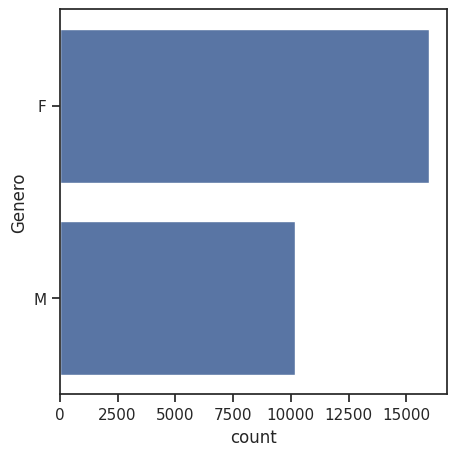

In [ ]:
# Proporción de Genero por Transacción:
# ==============================================================================
plt.figure(figsize=(5,5))
sns.countplot(Variables_categoricas["Genero"])
plt.show()

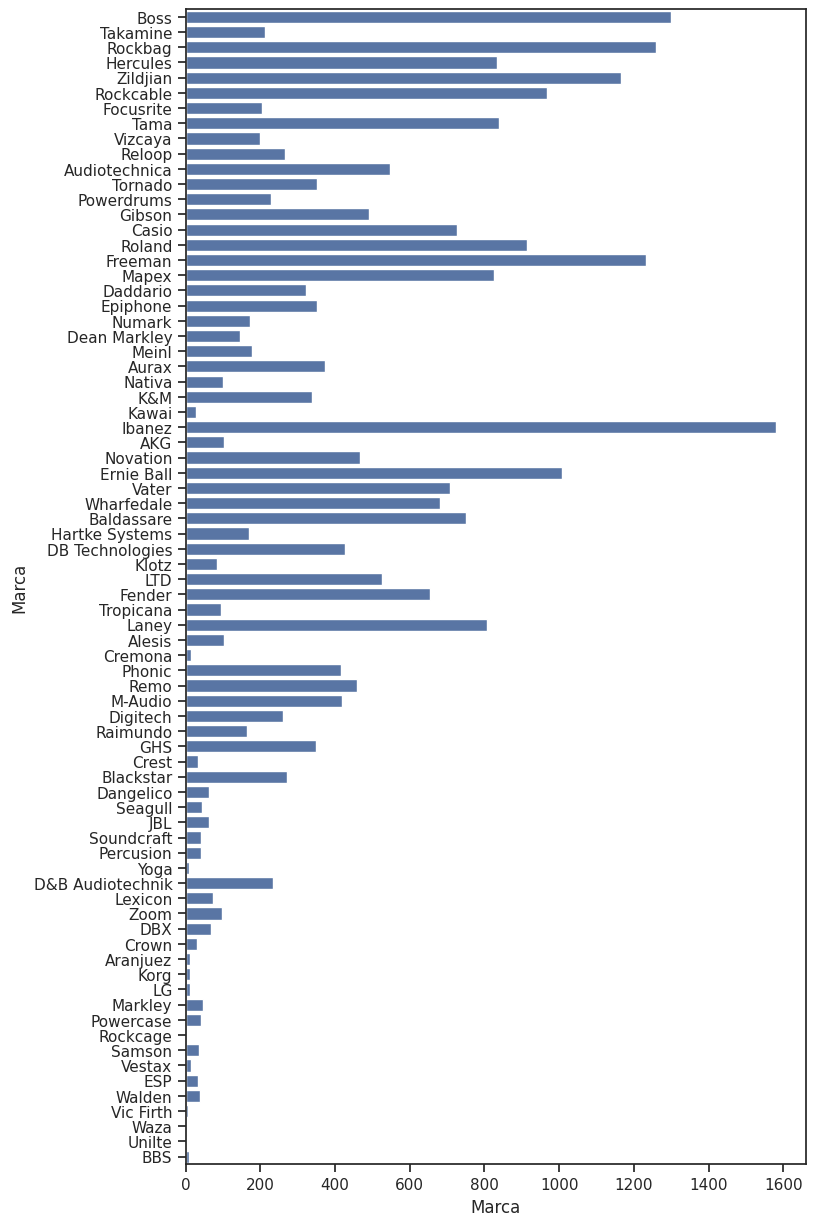

In [ ]:
# Marca con mayores Transacciones
# ==============================================================================
plt.figure(figsize=(8,15))
sns.countplot(Variables_categoricas["Marca"])
plt.xlabel("Marca")
plt.show()

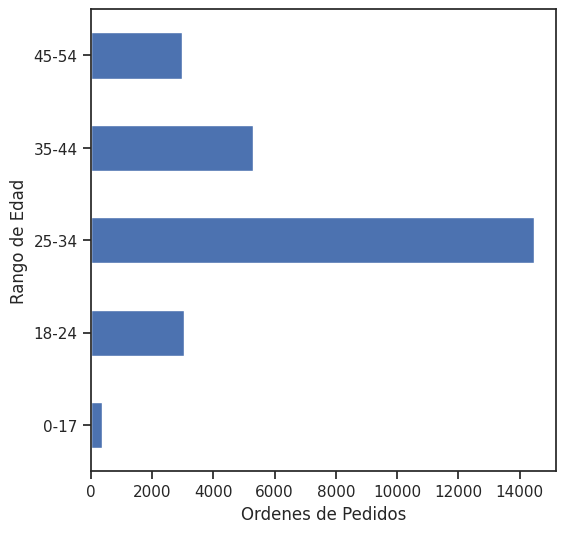

In [ ]:
# Ordenenes de Pedidos por Rango Edades
# ==============================================================================
plt.figure(figsize=(6,6))
df.groupby("Rango_Edad")["#Orden"].count().sort_index().plot(kind = "barh")
plt.xlabel("Ordenes de Pedidos")
plt.ylabel("Rango de Edad")
plt.show()

#### **Periodo de tiempo de los datos de transacción disponibles**

In [ ]:
# Periodo de Tempo de las Transacciones
# ==============================================================================
Fecha_Inicio = df["F_Envio"].min()
Fecha_Fin = df["F_Envio"].max()

print("El período de tiempo de los datos de transacción disponibles es de " + pd.Timestamp.strftime(Fecha_Inicio,format = "%d-%m-%Y") + " al " + pd.Timestamp.strftime(Fecha_Fin,format = "%d-%m-%Y"))

El período de tiempo de los datos de transacción disponibles es de 03-01-2015 al 05-01-2018


#### **Recuento de transacciones donde el monto total de la transacción fue negativo**

In [ ]:
# Recuento de transacciones donde el monto total de la transacción fue negativo
# ==============================================================================
Transaccion_negativa = df.loc[df["Venta_Totales"] < 0 , "Factura"].count()
print("El recuento de transacciones en las que el monto total de la transacción fue negativo es" , Transaccion_negativa)

El recuento de transacciones en las que el monto total de la transacción fue negativo es 0


### **Analizamos las categorías de productos que son más populares entre los clientes femeninos y masculinos.**

In [ ]:
# Agrupar el conjunto de datos según "Género" y "Familia"
# ==============================================================================
Productos_Populares = df.groupby(["Genero","Familia"])[["Cant_Enviada"]].sum().reset_index()
Productos_Populares.pivot(index = "Genero",columns = "Familia",values = "Cant_Enviada")

Familia,Abrazadera,Accesorio,Accesorio Limpieza,Acordeon,Afinador Guitarra,Amplificador,Armonica,Atril,Audifono,Bajo,...,Taburete,Teclado,Tornamesa,Triangulo,Trombon,Trompeta,Tropicana,Uñetas,Viola,Violin
Genero,,,,,,,,,,,,,,,,,,,,,
F,1338.0,1374.0,359.0,334.0,696.0,6136.0,69.0,12141.0,2366.0,3823.0,...,103.0,3034.0,810.0,131.0,320.0,544.0,116.0,4681.0,106.0,436.0
M,325.0,882.0,164.0,310.0,382.0,5966.0,12.0,9907.0,1898.0,3345.0,...,166.0,3520.0,753.0,26.0,575.0,456.0,46.0,2236.0,89.0,963.0


#### Los productos populares en Hombres son :
- Atril
- Amplificador
- Uñetas
- Teclado
- Audifono
- Accesorios en general
- Abrazaderas

#### Los productos populares en Mujeres son :
- Atril
- Amplificador
- Teclado
- Bajo
- Uñetas
- Audifono
- Violin

### **¿Qué Distrito tiene el máximo de clientes y cuál fue el porcentaje de clientes en ese distrito?**

In [ ]:
# Cantidad de Pedidos por distrito
# ==============================================================================
Cliente_Distrito = df.groupby(["Distrito"])["Cod_Cliente"].count().sort_values(ascending = False)
Cliente_Distrito
# Es la cantidad de Pedidos por distrito

,Cod_Cliente
Distrito,
Surco,8952
Miraflores,3127
San Borja,2898
Jesus Maria,2652
Lima Cercado,2600
La Victoria,2320
San Miguel,1300
Bellavista,1078
La Perla,290


In [ ]:
# Cantidad de Clientes por distrito
# ==============================================================================
Cliente_Distrito = df.groupby(["Distrito"])["Cod_Cliente"].nunique().sort_values(ascending=False)
Cliente_Distrito

,Cod_Cliente
Distrito,
Surco,780
San Borja,400
San Miguel,173
Bellavista,145
Lima Cercado,55
La Victoria,46
La Perla,38
Miraflores,7
San Isidro,4


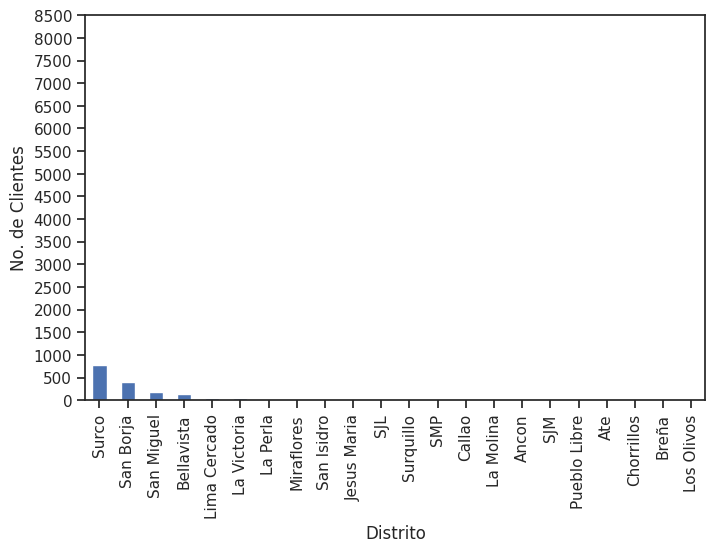

In [ ]:
# Grafico
# ==============================================================================
plt.figure(figsize = (8,5))
Cliente_Distrito.plot(kind = "bar")
plt.xlabel("Distrito")
plt.ylabel("No. de Clientes")
plt.yticks(np.arange(0 , 9000, step = 500))
plt.show()

In [ ]:
# Porcentaje de Clientes en Surco
# ==============================================================================
Porcentaje = round((Cliente_Distrito['Surco']/Cliente_Distrito.sum()) * 100,2)
print("El Distrito de Surco tiene el máximo de clientes y el porcentaje de clientes de la ciudad es ",Porcentaje)

El Distrito de Surco tiene el máximo de clientes y el porcentaje de clientes de la ciudad es  46.73


In [ ]:
# Porcentaje de clientes en todos los Distritos
# ==============================================================================

Total_clientes = Cliente_Distrito.sum()

# Calcula el porcentaje de clientes por distrito
porcentajes = (Cliente_Distrito / Total_clientes) * 100

# Muestra los porcentajes
print(porcentajes)

Distrito
Surco           46.734572
San Borja       23.966447
San Miguel      10.365488
Bellavista       8.687837
Lima Cercado     3.295386
La Victoria      2.756141
La Perla         2.276812
Miraflores       0.419413
San Isidro       0.239664
Jesus Maria      0.179748
SJL              0.179748
Surquillo        0.119832
SMP              0.119832
Callao           0.119832
La Molina        0.119832
Ancon            0.059916
SJM              0.059916
Pueblo Libre     0.059916
Ate              0.059916
Chorrillos       0.059916
Breña            0.059916
Los Olivos       0.059916
Name: Cod_Cliente, dtype: float64


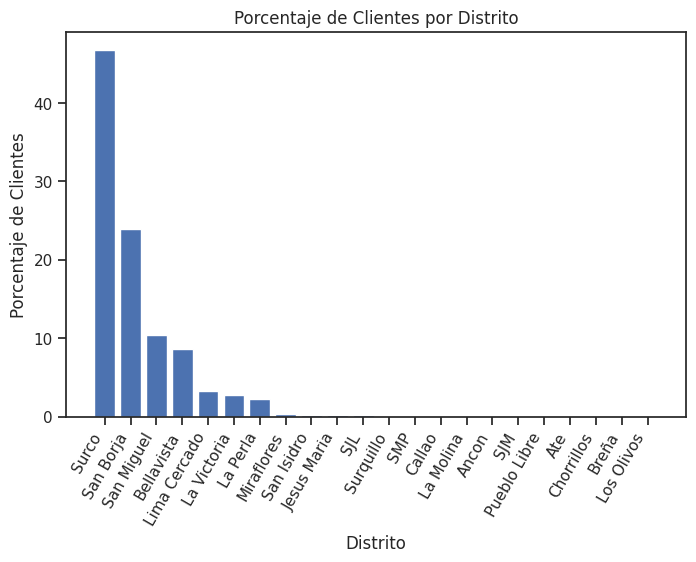

In [ ]:
# Porcentaje de clientes en todos los Distritos
# ==============================================================================
total_clientes = Cliente_Distrito.sum()

# Calcula el porcentaje de clientes por distrito
porcentajes = (Cliente_Distrito / total_clientes) * 100

# Crea el gráfico de barras
plt.figure(figsize = (8,5))
plt.bar(porcentajes.index, porcentajes.values)
plt.xlabel("Distrito")
plt.ylabel("Porcentaje de Clientes")
plt.title("Porcentaje de Clientes por Distrito")

# Rota el eje x 60 grados
plt.xticks(rotation=60, ha='right')

plt.show()

### **¿Qué Cliente vende el máximo de productos por valor y por cantidad?**

In [ ]:
# Clientes con mayor cantidad de productos vendidos y % Devolución
# ==============================================================================
df.groupby(["Cliente"])[["Cant_Enviada","%Devolucion"]].sum().sort_values(by="Cant_Enviada",ascending = False)

,Cant_Enviada,%Devolucion
Cliente,,
Audiomusica Peru S.A.C.,44948,21.870728
Pedro Orizona Rojas,2887,0.813726
Miriam Melit Delgado Tan,1369,1.185475
Importaciones Rodson Music S.A.C,1253,0.377991
Edgard Tello Anaya,1184,0.046195
...,...,...
Pizarro Urrutia Maria Luisa,12,0.009052
Flores De La Cruz Alexander,12,0.000000
Rafael Flores Maria Elena,11,0.000000


In [ ]:
print("Audiomusica Peru S.A.C vende el máximo de productos por valor y por cantidad")

Audiomusica Peru S.A.C vende el máximo de productos por valor y por cantidad


### **¿Cuál fue el monto total ganado en las categorías "Guitarra" y "Atril"?**

In [ ]:
# Ganancia por Familia
# ==============================================================================
Familia_Grupo = round(df.pivot_table(index = "Familia", columns = "Prioridad", values = "Ganancia",  aggfunc = "sum"),2)
Familia_Grupo

Prioridad,Critical,High,Low,Medium
Familia,,,,
Abrazadera,3816.97,9712.71,726.02,22423.24
Accesorio,2253.50,36434.80,3657.65,41667.74
Accesorio Limpieza,481.93,4409.63,386.73,7205.11
Acordeon,140666.99,315266.72,100033.17,335544.73
Afinador Guitarra,2366.01,5964.27,1490.72,19425.20
...,...,...,...,...
Trompeta,9984.90,36257.05,4593.87,129943.04
Tropicana,950.60,8270.22,1235.78,4943.12
Uñetas,20971.09,99553.09,16445.14,161065.91


In [ ]:
# El Total ganado en las categorías "Guitarra" y "Atril"
# ==============================================================================
Total_Ganancia = Familia_Grupo.loc[["Guitarra","Atril"],"Low"].sum()
print("La cantidad total ganada en las categorías de Guitarra y Atril de Audiomusica es ", Total_Ganancia)

La cantidad total ganada en las categorías de Guitarra y Atril de Audiomusica es  832512.42


### **¿Cuál es la Ganancia obtenida por los clientes "Masculinos" en la categoría "Guitarra"?**

In [ ]:
# Ganancia por Genero y Familia de Productos
# ==============================================================================
Genero_Grupo = round(df.pivot_table(index = "Familia", columns = "Genero", values = "Ganancia",  aggfunc = "sum"),2)
Genero_Grupo

Genero,F,M
Familia,,
Abrazadera,30457.00,6221.94
Accesorio,59235.55,24778.14
Accesorio Limpieza,8650.52,3832.88
Acordeon,481122.87,410388.74
Afinador Guitarra,20390.74,8855.46
...,...,...
Trompeta,117454.97,63323.89
Tropicana,11026.96,4372.76
Uñetas,125080.16,172955.07


In [ ]:
# Ganancia del genero MAsculino en la Categoria Guitarra
# ==============================================================================
Ganancia_Masculina = Genero_Grupo.loc["Guitarra","M"].sum()
#Ganancia_Masculina
print("La Ganancia total por los hombres en la categoría Guitarra es", Ganancia_Masculina)

La Ganancia total por los hombres en la categoría Guitarra es 7320417.01


### **¿Cuántos clientes tienen más de 10 transacciones únicas, después de eliminar todas las transacciones que tienen montos negativos?**

In [ ]:
# Creando un Dataframe que no tenga Transacciones negativas de clientes
# ==============================================================================
Transac_Positivas = df.loc[df["Ganancia"]>0,:]
Transac_Positivas.head()

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_por_Distribucion_SDD,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping,Slotting_Recepcion_Prom,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica
0,2015-01-03,2204383,3111,204978,Shipping,Standard Class,CON-10004331147,2015-01-03,2015-01-03,80,...,66603.25,0.0,349.650000,164.365385,223.8,291.375000,560.635385,66603.25,528.600,67692.485385
1,2015-01-03,2204384,3112,1097514,Shipping,Standard Class,EMP-20449216343,2015-01-05,2015-01-05,27,...,3379.95,0.0,413.696970,194.472935,49.0,344.747475,663.329501,3379.95,70.425,4113.704501
2,2015-01-03,2204387,3115,204754,Shipping,Standard Class,CON-10004331147,2015-01-05,2015-01-05,22,...,66150.00,0.0,8.910000,4.188462,11.8,7.425000,14.286462,66150.00,4488.750,70653.036462
3,2015-01-03,2204382,3110,1001830,Shipping,Standard Class,CON-10181604579,2015-01-05,2015-01-06,90,...,0.00,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,21752.75,32387.400,54360.743328
4,2015-01-05,2204395,3123,1001830,Shipping,Standard Class,EMP-20447989051,2015-01-06,2015-01-06,81,...,30453.85,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,30453.85,32387.400,63061.843328


In [ ]:
# Dataframe con transacciones positivas únicas
# ==============================================================================
Transac_Unicas  = Transac_Positivas.groupby(["Cod_Cliente","Familia","Distrito"])["Factura"].count().reset_index()
Transac_Unicas

,Cod_Cliente,Familia,Distrito,Factura
0,CON-00565825,Amplificador,La Molina,8
1,CON-00565825,Atril,La Molina,22
2,CON-00565825,Baqueta,La Molina,2
3,CON-00565825,Cable,La Molina,3
4,CON-00565825,Funda,La Molina,3
...,...,...,...,...
9989,RET3-20503324033,Teclado,Miraflores,6
9990,RET3-20503324033,Trombon,Miraflores,3
9991,RET3-20503324033,Trompeta,Miraflores,4
9992,RET3-20503324033,Tropicana,Miraflores,15


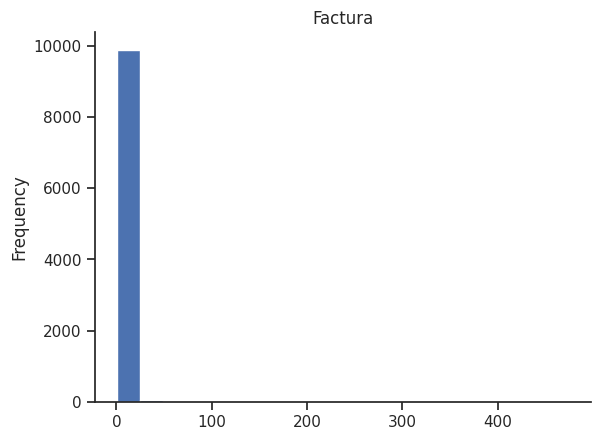

In [ ]:
# @title Factura

from matplotlib import pyplot as plt
Transac_Unicas['Factura'].plot(kind='hist', bins=20, title='Factura')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Clientes que tengan transacciones únicas mayores a 10
# ==============================================================================
Conteo_Transac_Unicas = Transac_Unicas.groupby("Cod_Cliente")["Factura"].count().reset_index()
Conteo_Transac_Unicas

,Cod_Cliente,Factura
0,CON-00565825,7
1,CON-00651004,7
2,CON-01026227,5
3,CON-01126180,6
4,CON-01140946,6
...,...,...
1664,EMP-20600030044,3
1665,EMP-20600701852,10
1666,RET1-20503324033,55
1667,RET2-20503324033,62


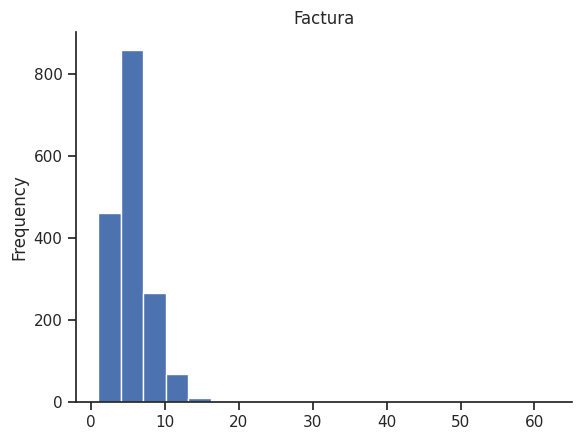

In [ ]:
# @title Factura

from matplotlib import pyplot as plt
Conteo_Transac_Unicas['Factura'].plot(kind='hist', bins=20, title='Factura')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Clientes con Pedidos mayores a 10
# ==============================================================================
Conteo_Transac_Unicas[Conteo_Transac_Unicas["Factura"]>10] # Se puede modificar el numero de Pedidos

,Cod_Cliente,Factura
12,CON-01311269,12
42,CON-10011551497,11
44,CON-10026543342,12
51,CON-10033668452,12
77,CON-10088899,15
...,...,...
1650,EMP-20553376328,12
1660,EMP-20562984527,11
1666,RET1-20503324033,55
1667,RET2-20503324033,62


### **Cómo tenemos que tratar con clientes de entre 25 a 34?**

In [ ]:
# Agrupando el Dataframe 'df' sobre la base de 'Rango_Edad' y 'Distrito'
# ==============================================================================
Cliente_25_34 = df.groupby(['Rango_Edad','Familia'])['Venta_Totales'].sum()
Cliente_25_34

Rango_Edad  Familia           
0-17        Accesorio               4068.15
            Accesorio Limpieza         3.58
            Amplificador          596732.03
            Atril                 300967.46
            Audifono                1139.85
                                    ...    
45-54       Trompeta               20079.59
            Tropicana               3448.85
            Uñetas                154925.39
            Viola                  24403.27
            Violin                 95947.81
Name: Venta_Totales, Length: 336, dtype: float64

In [ ]:
# Clientes entre 25 y 34 años que compraron "Guitarra" y "Audifonos"
# ==============================================================================
Cliente_25_34.loc["25-34" , ["Guitarra" , "Audifono"]]

Rango_Edad  Familia 
25-34       Guitarra    15329492.18
            Audifono      247259.64
Name: Venta_Totales, dtype: float64

In [ ]:
# Total gastado por los clientes en rangos de 25 y 34 años en "Guitarra" y "Audifonos"
# ==============================================================================

print("El importe total gastado en las categorías de productos 'Guitarra' y 'Audifonos' es",
      Cliente_25_34.loc['25-34',['Audifono','Guitarra']].sum().round(2))

El importe total gastado en las categorías de productos 'Guitarra' y 'Audifonos' es 15576751.82


### **¿Cuál fue el monto total gastado por estos clientes entre el 1 de enero de 2015 y el 1 de marzo de 2015?**

In [ ]:
# Filtrando datos que pertenecen al 'Rango_edad' = 25-35
# ==============================================================================
Cliente_total_gastado_25_34 = df[df['Rango_Edad']=='25-34']
Cliente_total_gastado_25_34.head()

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_por_Distribucion_SDD,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping,Slotting_Recepcion_Prom,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica
1,2015-01-03,2204384,3112,1097514,Shipping,Standard Class,EMP-20449216343,2015-01-05,2015-01-05,27,...,3379.95,0.0,413.696970,194.472935,49.0,344.747475,663.329501,3379.95,70.425,4.113705e+03
8,2015-01-03,2204390,3118,208103,Shipping,Standard Class,EMP-20523880404,2015-01-05,2015-01-06,6,...,0.00,0.0,39.474900,18.556577,13.2,32.895750,63.294797,156187.50,96836.250,2.530870e+05
13,2015-01-03,2204384,3112,1002050,Shipping,Standard Class,EMP-20449216343,2015-01-05,2015-01-06,36,...,0.00,0.0,34.020000,15.992308,5.4,28.350000,54.548308,87600.00,4380.000,9.203455e+04
15,2015-01-06,2204396,3124,1100761,Shipping,Standard Class,EMP-20600030044,2015-01-07,2015-01-07,236,...,19844755.00,0.0,525.874264,247.205851,263.2,438.228554,843.196684,19844755.00,231831.250,2.007743e+07
17,2015-01-06,2204398,3126,1002050,Shipping,Standard Class,EMP-20449216343,2015-01-07,2015-01-07,36,...,122640.00,0.0,34.020000,15.992308,5.4,28.350000,54.548308,122640.00,4380.000,1.270745e+05


In [ ]:
# ¿Obteniendo todos los datos con la fecha de transacción entre el 3 de enero de 2015 y el 1 de marzo de 2015?
# ==============================================================================
Total_gasto = Cliente_total_gastado_25_34[(Cliente_total_gastado_25_34['F_Orden'] >='2015-01-03') & (Cliente_total_gastado_25_34['F_Orden'] <='2015-03-01')]
Total_gasto.head()

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_por_Distribucion_SDD,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping,Slotting_Recepcion_Prom,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica
1,2015-01-03,2204384,3112,1097514,Shipping,Standard Class,EMP-20449216343,2015-01-05,2015-01-05,27,...,3379.95,0.0,413.696970,194.472935,49.0,344.747475,663.329501,3379.95,70.425,4.113705e+03
8,2015-01-03,2204390,3118,208103,Shipping,Standard Class,EMP-20523880404,2015-01-05,2015-01-06,6,...,0.00,0.0,39.474900,18.556577,13.2,32.895750,63.294797,156187.50,96836.250,2.530870e+05
13,2015-01-03,2204384,3112,1002050,Shipping,Standard Class,EMP-20449216343,2015-01-05,2015-01-06,36,...,0.00,0.0,34.020000,15.992308,5.4,28.350000,54.548308,87600.00,4380.000,9.203455e+04
15,2015-01-06,2204396,3124,1100761,Shipping,Standard Class,EMP-20600030044,2015-01-07,2015-01-07,236,...,19844755.00,0.0,525.874264,247.205851,263.2,438.228554,843.196684,19844755.00,231831.250,2.007743e+07
17,2015-01-06,2204398,3126,1002050,Shipping,Standard Class,EMP-20449216343,2015-01-07,2015-01-07,36,...,122640.00,0.0,34.020000,15.992308,5.4,28.350000,54.548308,122640.00,4380.000,1.270745e+05


In [ ]:
print('El importe total gastado por clientes de entre 25 y 34 años entre el 3 de enero de 2015 y el 1 de marzo de 2015 es', Total_gasto['Venta_Totales'].sum())

El importe total gastado por clientes de entre 25 y 34 años entre el 3 de enero de 2015 y el 1 de marzo de 2015 es 6634402.91
